# Machine Learning with Python Guided Project

kaggle competition
https://www.kaggle.com/competitions/spaceship-titanic

ask data science teacher brandyn a question
https://www.facebook.com/datascienceteacherbrandyn/

ML with sklearn group
https://www.facebook.com/groups/575574217682061

data analytics in python group
https://www.facebook.com/groups/1531938470572261

share your dataArt - the art of data science
https://www.facebook.com/groups/1038628576726134

deeplearning with tensorflow group
https://www.facebook.com/groups/369278408349330

full video library
https://datastudio.google.com/u/0/reporting/94118f3a-a19d-44f1-a99d-63520ac9a452/page/xhPqC


DataSimple
https://www.datasimple.education/



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import make_pipeline

In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
df.head(3)

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck             Name  \
0          0.0        0.0           0.0     0.0     0.0  Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0     Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0    Altark Susent   

   Transported  
0        False  
1         True  
2        False

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


# EDA - Univariate

## Inspecting Null Values

In [ ]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

**Observations**

+ Every column except PassengerID and Transported have null values

## Set style and Palette as  pal

In [ ]:
import matplotlib
matplotlib.style.use('bmh')

In [ ]:
pal = ['#360B06','#6E3925','#A49D44','#8BCE5F','#F1AE1B']

### def r_color

In [ ]:
def r_color(num=2, seed=None):

  if seed==None:
    seed = np.random.randint(0,420,size=1)
  np.random.seed(seed)
  print(seed)


  return [pal[i] for i in np.random.randint(0,5,size=num)]

### def count_plot

In [ ]:
def count_plot(column, seed=None, num=3, transported=False):
  plt.figure(figsize=(10,5))
  sns.countplot(data=df, x=column, palette=r_color(num, seed=seed),)
  plt.title(f'count of {column} \n', fontsize=20, fontweight='bold')
  plt.xlabel('count',fontweight='bold')
  plt.ylabel(column, fontweight='bold')
  plt.show()
  print('value_counts\n',df[column].value_counts())
  print('')
  print('')
  if transported:
    print('transported grouped by \n', df.groupby(column)['Transported'].value_counts()) ## show this change


  # return

## HomePlanet

In [ ]:
df['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

222


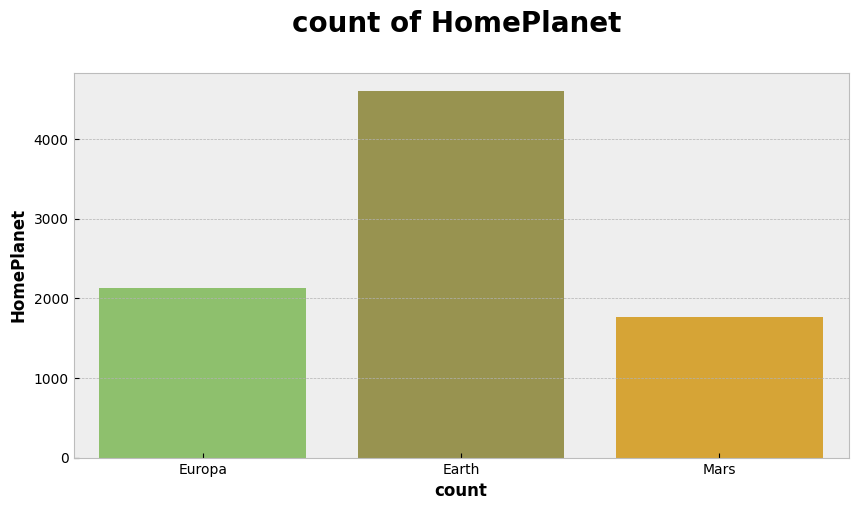

value_counts
 Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64




In [ ]:
count_plot('HomePlanet', seed=222)

**Observations**

+ More than half are from Earth
+ The remaining is split almost equally between Europa and Mars

## CryoSleep

242


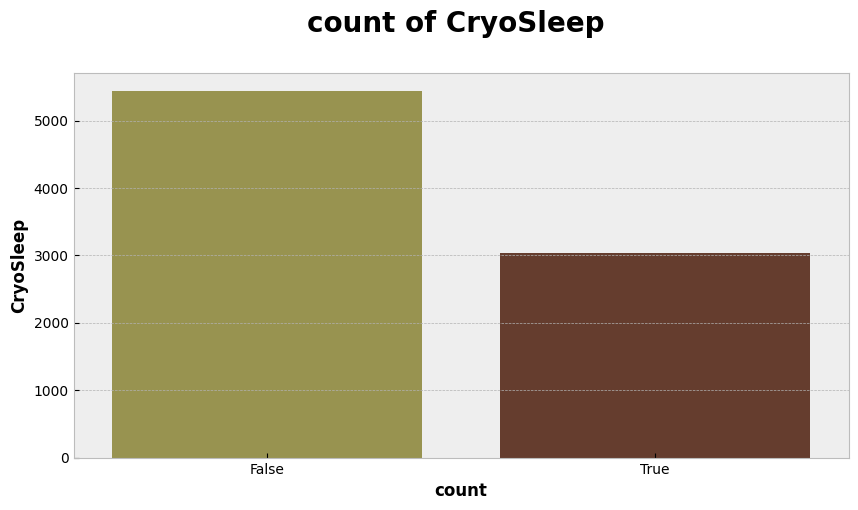

value_counts
 False    5439
True     3037
Name: CryoSleep, dtype: int64




In [ ]:
count_plot('CryoSleep', seed=242)

**Observations**

+ slightly imblanced, almost double the count for False than for True

+ **About 2/3 of people were not in CryoSleep**



In [ ]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

## Cabin

In [ ]:
# count_plot('Cabin')

+ Made up of a unstructure list of cabin [ zone / seat / code ]

In [ ]:
df['Cabin'] = df['Cabin'].fillna('0')

In [ ]:
df['Cabin'] = df['Cabin'].str.split('/')
df['Cabin']

0          [B, 0, P]
1          [F, 0, S]
2          [A, 0, S]
3          [A, 0, S]
4          [F, 1, S]
            ...     
8688      [A, 98, P]
8689    [G, 1499, S]
8690    [G, 1500, S]
8691     [E, 608, S]
8692     [E, 608, S]
Name: Cabin, Length: 8693, dtype: object

In [ ]:
df['Cabin'].isnull().sum()

0

In [ ]:
[print(type(x), x) for x in df['Cabin']]

Se han truncado las últimas 5000 líneas del flujo de salida.
<class 'list'> ['G', '649', 'P']
<class 'list'> ['F', '819', 'P']
<class 'list'> ['G', '650', 'P']
<class 'list'> ['F', '751', 'S']
<class 'list'> ['G', '651', 'P']
<class 'list'> ['E', '240', 'P']
<class 'list'> ['F', '752', 'S']
<class 'list'> ['G', '652', 'S']
<class 'list'> ['0']
<class 'list'> ['E', '241', 'P']
<class 'list'> ['G', '653', 'P']
<class 'list'> ['0']
<class 'list'> ['G', '654', 'S']
<class 'list'> ['G', '654', 'P']
<class 'list'> ['F', '755', 'S']
<class 'list'> ['F', '755', 'S']
<class 'list'> ['F', '822', 'P']
<class 'list'> ['D', '134', 'P']
<class 'list'> ['F', '823', 'P']
<class 'list'> ['F', '756', 'S']
<class 'list'> ['B', '152', 'S']
<class 'list'> ['G', '655', 'P']
<class 'list'> ['F', '825', 'P']
<class 'list'> ['G', '655', 'P']
<class 'list'> ['G', '655', 'P']
<class 'list'> ['G', '655', 'P']
<class 'list'> ['G', '655', 'P']
<class 'list'> ['F', '826', 'P']
<class 'list'> ['G', '657', 'S']
<class

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

### def get_cabin

In [ ]:
def get_cabin(x):
  print(x)
  print(type(x))
  print(type(x) == np.float32)
  print('nan', x == np.nan)
  if type(x) == 'float':
    return np.nan
  elif len(x) > 1:
    return x[0]
  else:
    return x[0]

In [ ]:
df['Cabin_zone'] = df['Cabin'].apply(get_cabin)

Se han truncado las últimas 5000 líneas del flujo de salida.
['E', '525', 'S']
<class 'list'>
False
nan False
['F', '1648', 'P']
<class 'list'>
False
nan False
['G', '1290', 'P']
<class 'list'>
False
nan False
['G', '1288', 'S']
<class 'list'>
False
nan False
['D', '232', 'S']
<class 'list'>
False
nan False
['C', '258', 'P']
<class 'list'>
False
nan False
['B', '260', 'P']
<class 'list'>
False
nan False
['B', '260', 'P']
<class 'list'>
False
nan False
['C', '297', 'S']
<class 'list'>
False
nan False
['C', '259', 'P']
<class 'list'>
False
nan False
['C', '259', 'P']
<class 'list'>
False
nan False
['G', '1289', 'S']
<class 'list'>
False
nan False
['F', '1652', 'P']
<class 'list'>
False
nan False
['G', '1293', 'P']
<class 'list'>
False
nan False
['B', '261', 'P']
<class 'list'>
False
nan False
['B', '261', 'P']
<class 'list'>
False
nan False
['0']
<class 'list'>
False
nan False
['F', '1653', 'P']
<class 'list'>
False
nan False
['F', '1653', 'P']
<class 'list'>
False
nan False
['F', '1653'

In [ ]:
df['Cabin_zone'].value_counts()

F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
0     199
T       5
Name: Cabin_zone, dtype: int64

106


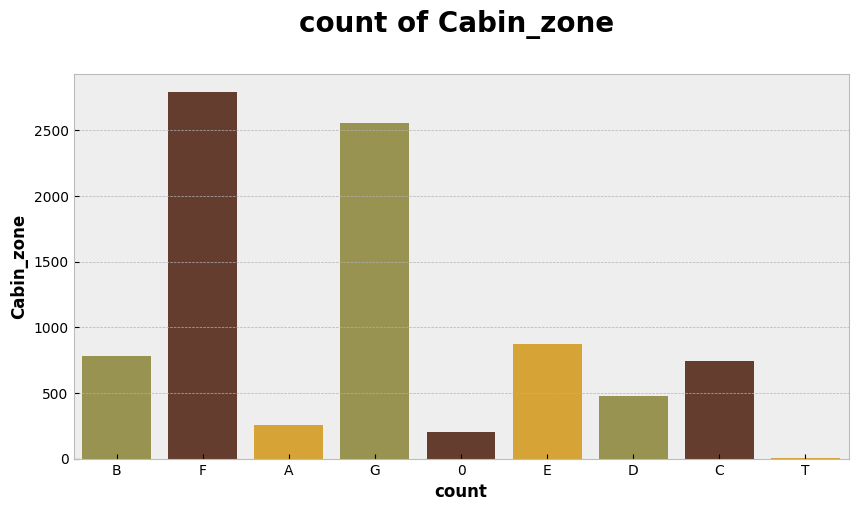

value_counts
 F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
0     199
T       5
Name: Cabin_zone, dtype: int64




In [ ]:
count_plot('Cabin_zone', seed=106)

**Observations**

+ Cabin_zone - imbalanced data set T, O, A are represented the least.  **Reduce Dimensions**

In [ ]:
def get_code(x):
  print(x)
  print(type(x) == np.float16)
  if type(x) == 'float':
    return np.nan
  elif len(x) > 1:
    return x[2]
  else:
    return x[0]

In [ ]:
df['Cabin_code'] = df['Cabin'].apply(get_code)

Se han truncado las últimas 5000 líneas del flujo de salida.
['F', '1358', 'P']
False
['G', '1065', 'S']
False
['F', '1251', 'S']
False
['D', '198', 'S']
False
['G', '1061', 'P']
False
['F', '1360', 'P']
False
['F', '1362', 'P']
False
['F', '1362', 'P']
False
['E', '417', 'P']
False
['F', '1363', 'P']
False
['F', '1253', 'S']
False
['B', '253', 'S']
False
['B', '253', 'S']
False
['F', '1364', 'P']
False
['F', '1254', 'S']
False
['G', '1067', 'S']
False
['E', '437', 'S']
False
['F', '1255', 'S']
False
['G', '1063', 'P']
False
['F', '1365', 'P']
False
['F', '1366', 'P']
False
['G', '1064', 'P']
False
['G', '1068', 'S']
False
['F', '1256', 'S']
False
['F', '1257', 'S']
False
['A', '65', 'P']
False
['E', '438', 'S']
False
['F', '1259', 'S']
False
['G', '1066', 'P']
False
['A', '66', 'P']
False
['B', '254', 'S']
False
['B', '254', 'S']
False
['G', '1071', 'S']
False
['F', '1260', 'S']
False
['G', '1073', 'S']
False
['G', '1073', 'S']
False
['B', '217', 'P']
False
['B', '217', 'P']
False
['F

385


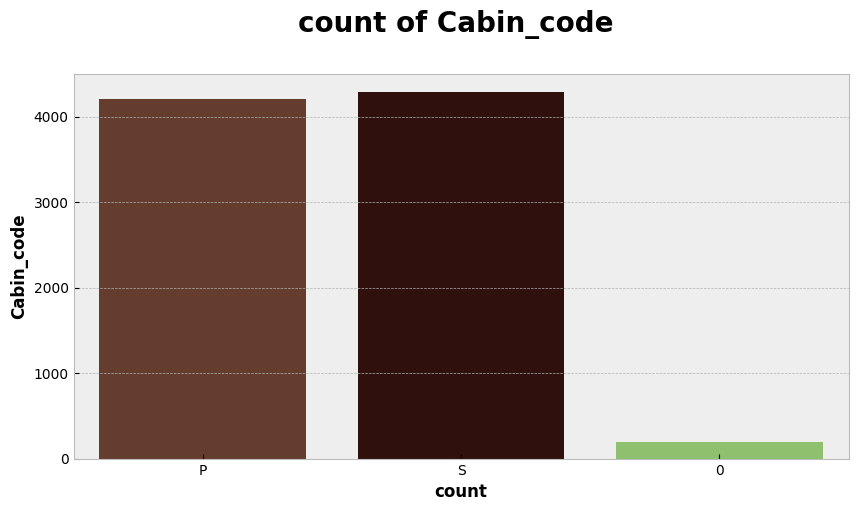

value_counts
 S    4288
P    4206
0     199
Name: Cabin_code, dtype: int64




In [ ]:
count_plot('Cabin_code', seed=385)

**Observations**

+ Cabin_code - 3 classes, balanced between P and S, O is unbalanced with other classes with only %5 of the frequency  **reduce dimensions**

## Destination

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8693 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
 14  Cabin_zone    8693 non-null   object 
 15  Cabin_code    8693 non-null   object 
dtypes: bool(1), float64(6), object(9)
memory usage: 1.0+ MB


215


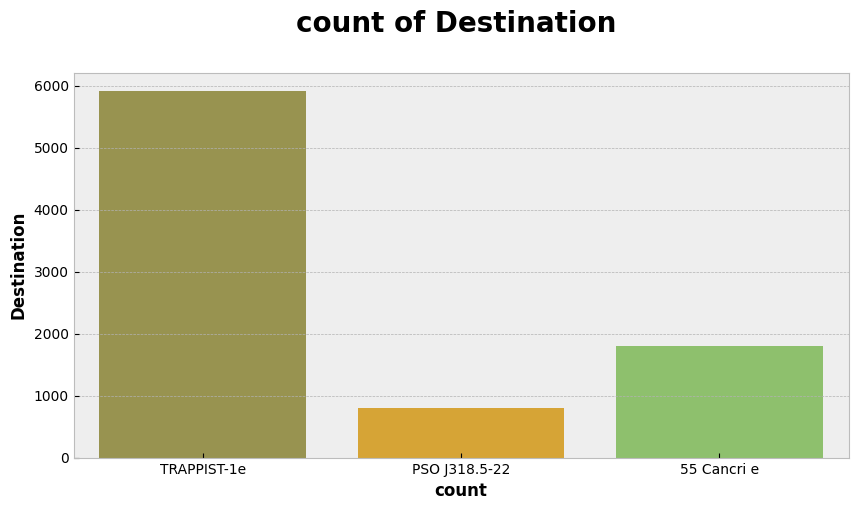

value_counts
 TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64




In [ ]:
count_plot('Destination', seed=215)

**Observations**

+ Destination - TRAPPIST-1e makes up the majority, 55 Cancri e and PSO J318.5-22 are under represented.  **dimension reduction**

### def hist_plot

In [ ]:
def hist_plot(column, bins=30, hue=None, num=3):
  plt.figure(figsize=(12,5))
  sns.histplot(data=df, x=column, color=r_color(num)[0], bins=bins)
  plt.title(f'\n {column} \n', fontsize=22, fontweight='bold')
  plt.show()

## Age

[26]


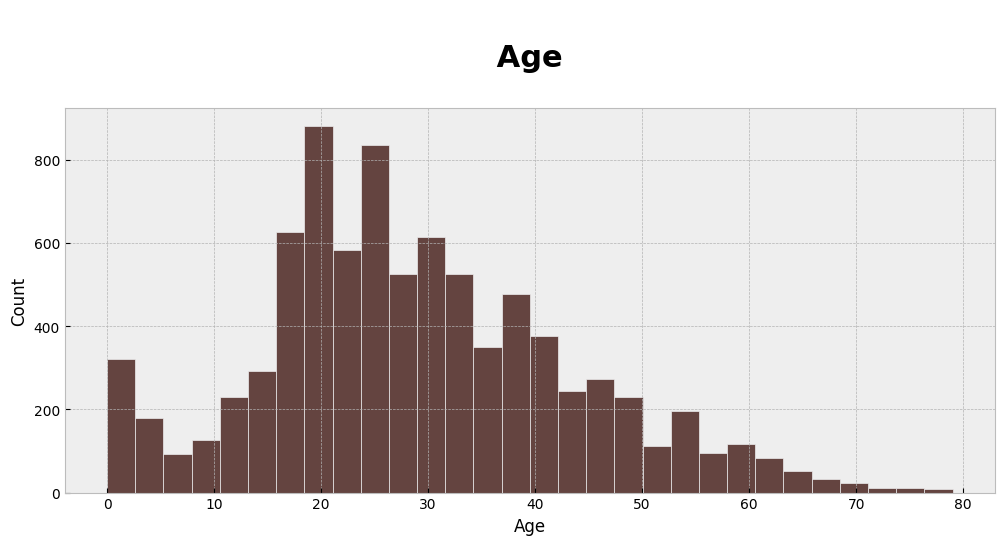

In [ ]:
hist_plot('Age')

**Observations**

+ Age - semi-normal distribution with tail on right side.  **Treat outliers**

## VIP

307


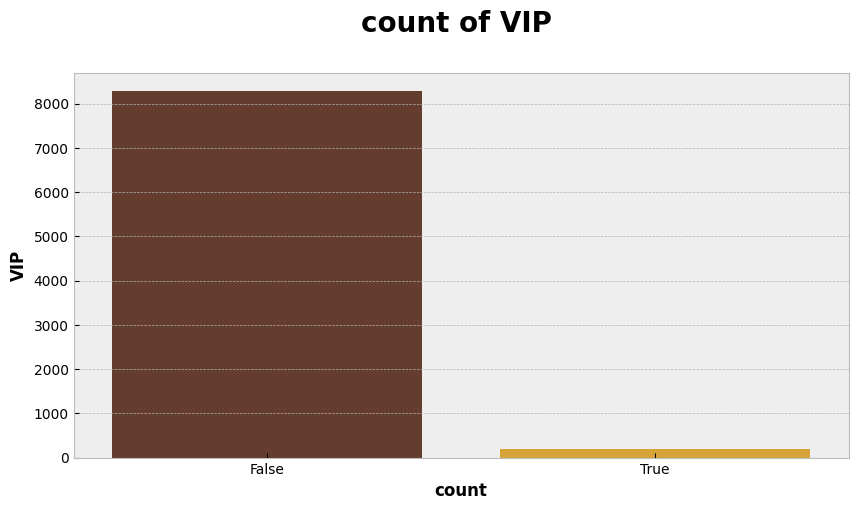

value_counts
 False    8291
True      199
Name: VIP, dtype: int64




In [ ]:
count_plot('VIP', seed=307)

**observations**

+ VIP - large imabalance,  True only represents 200 rows.  **Investigate if has any relationship to target, if not could drop column**

## RoomService

[317]


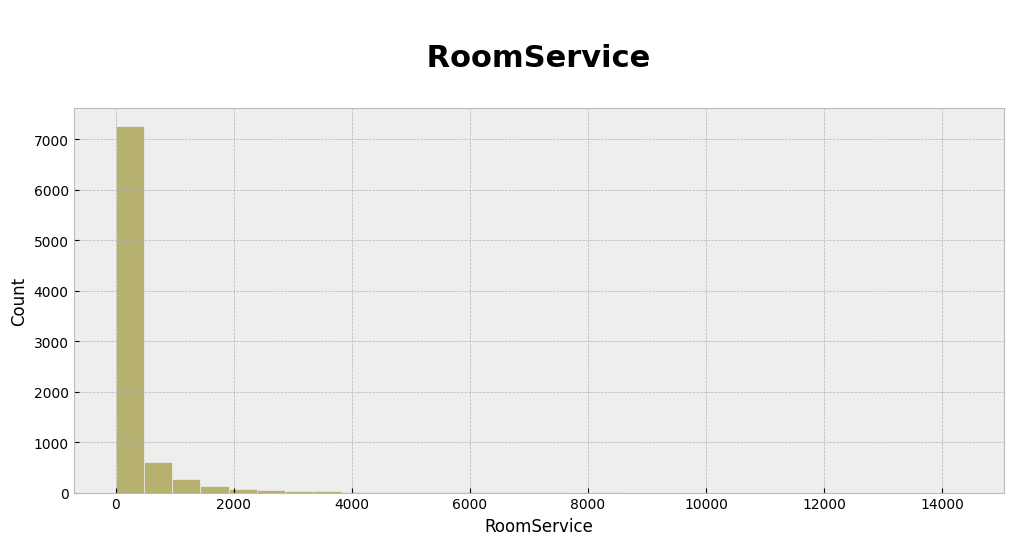

In [ ]:
hist_plot('RoomService', num=1)

**Observations**

+ RoomService - **Outliers on right hand side**

## FoodCourt

[110]


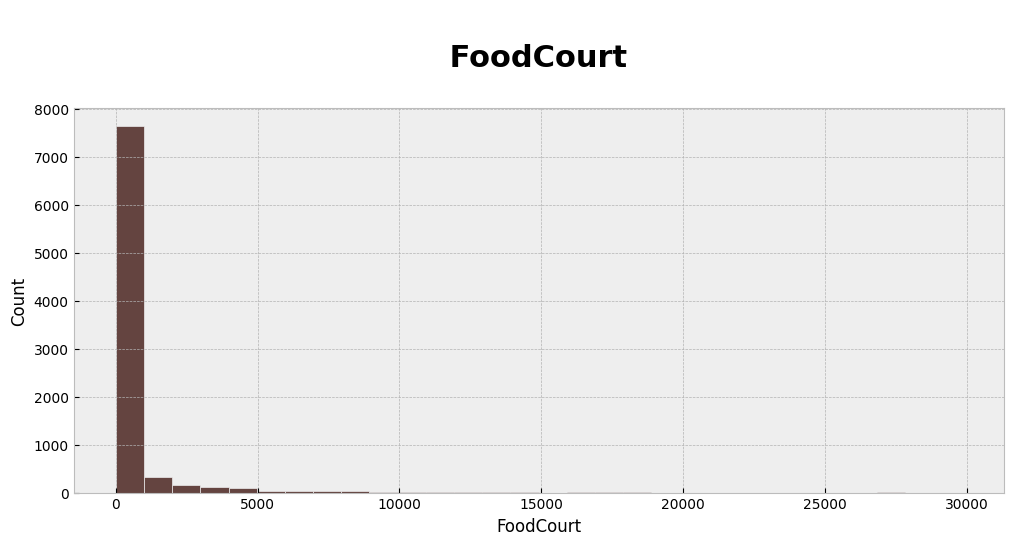

In [ ]:
hist_plot('FoodCourt', num=1)

**Observations**

+ FoodCourt - **Outliers on right hand side**

## ShoppingMall

[227]


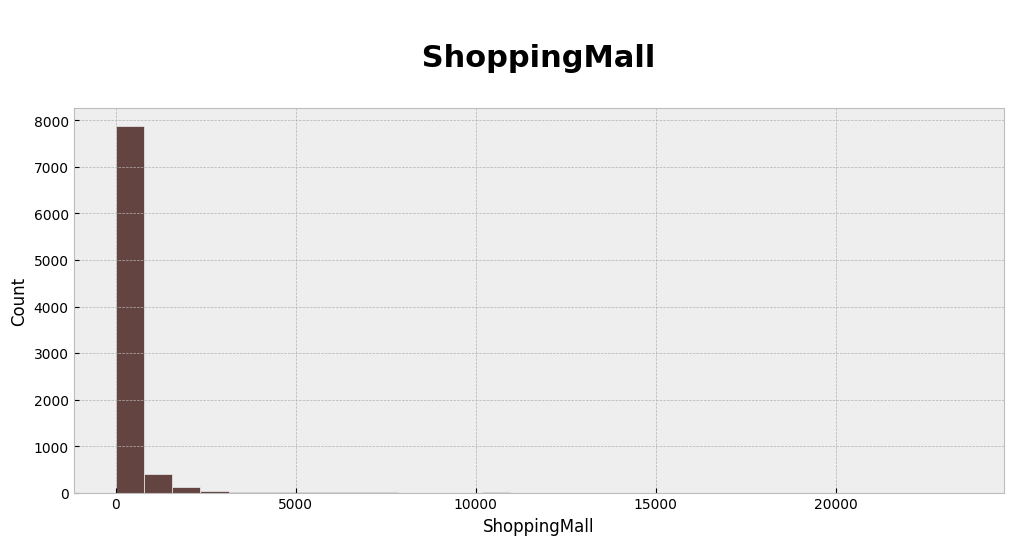

In [ ]:
hist_plot('ShoppingMall', num=1)

**Observations**

+ ShoppingMall - **Outliers on right hand side**

## SPA

[360]


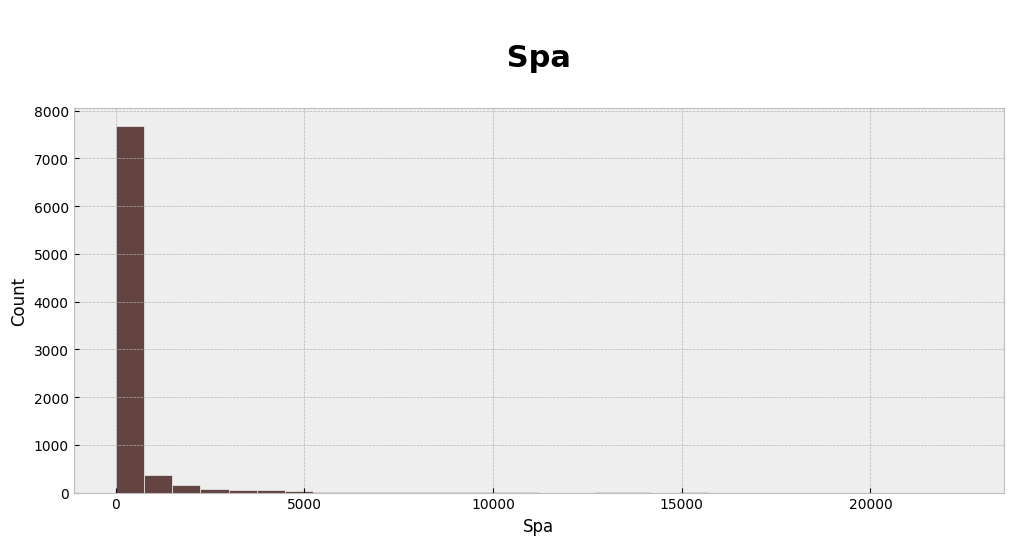

In [ ]:
hist_plot('Spa', num=1)

**Observations**

+ Spa - **Outliers on right hand side**

## VRDeck

[189]


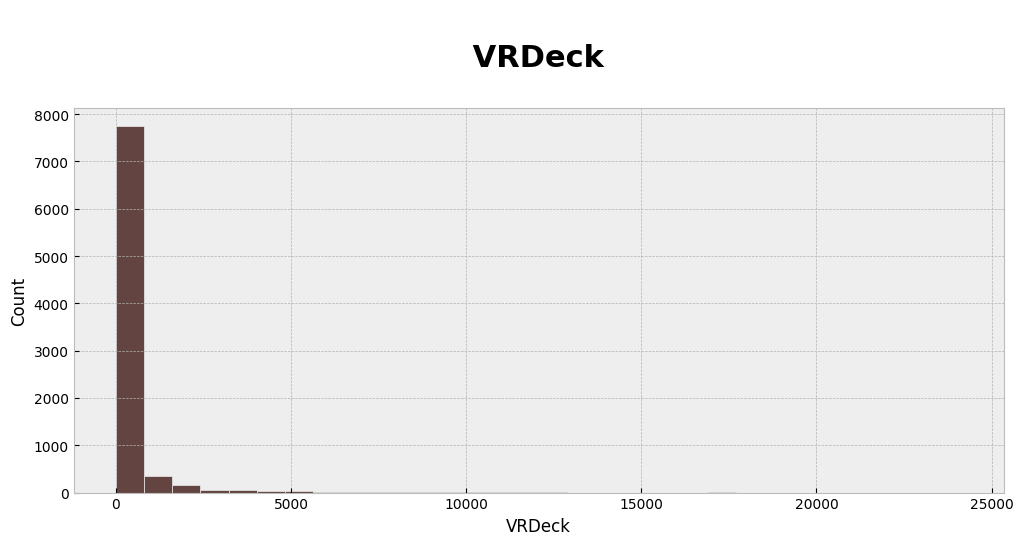

In [ ]:
hist_plot('VRDeck', num=1)

**Observations**

+ VRDeck - **Outliers on right hand side**

## Transported

215


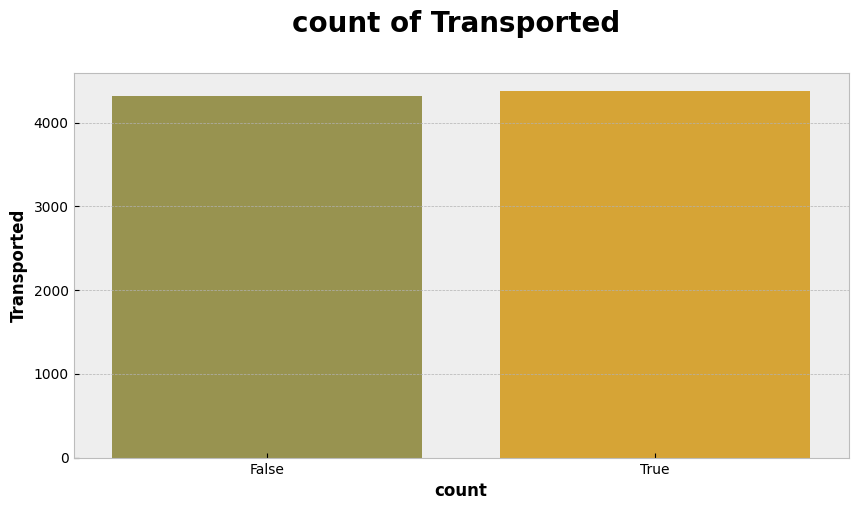

value_counts
 True     4378
False    4315
Name: Transported, dtype: int64




In [ ]:
count_plot('Transported', seed=215)

# EDA - Bivariate with Target

### def displot

In [ ]:
column = 'VIP'

In [ ]:
df_tmp1 = pd.DataFrame(df[column].value_counts() / sum(df[column].value_counts()))
df_tmp2 = pd.DataFrame(df[df['Transported'] == 1 ][column].value_counts() / sum(df[df['Transported'] == 1 ][column].value_counts()))
df_tmp3 = df_tmp2 - df_tmp1
df_final = pd.concat([df_tmp1,df_tmp2,df_tmp3], axis=1)
df_final.columns = [f'% {column} Start', f'% {column} Transp\'d', 'Difference']
df_final.T

False      True
% VIP Start     0.976561  0.023439
% VIP Transp'd  0.982218  0.017782
Difference      0.005657 -0.005657

In [ ]:
def dis_plot(column):


  df_tmp1 = pd.DataFrame(df[column].value_counts() / sum(df[column].value_counts()))
  df_tmp2 = pd.DataFrame(df[df['Transported'] == 1 ][column].value_counts() / sum(df[df['Transported'] == 1 ][column].value_counts()))
  df_tmp3 = df_tmp2 - df_tmp1
  df_final = pd.concat([df_tmp1,df_tmp2,df_tmp3], axis=1)
  df_final.columns = [f'% {column} Start', f'% {column} Transp\'d', 'Difference']
  sns.displot(data=df, x=column, col='Transported', color=r_color(1)[0], bins=30)
  plt.show()
  sns.histplot(data=df_final['Difference'], color=r_color(1)[0], bins=30)
  plt.title('difference in porportion')
  plt.show()
  return df_final.T

## HomePlanet and Transported

[26]


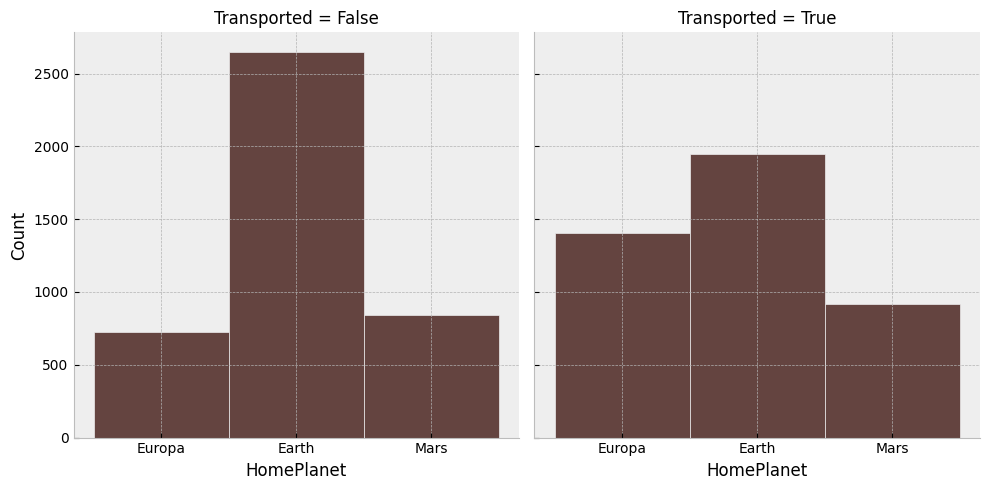

[102]


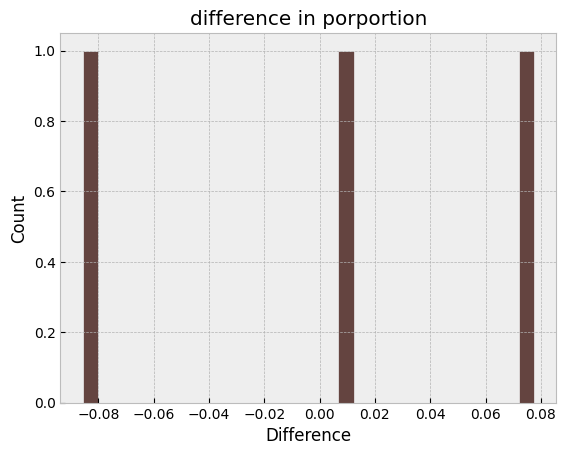

Earth    Europa      Mars
% HomePlanet Start     0.541922  0.250942  0.207136
% HomePlanet Transp'd  0.456374  0.328421  0.215205
Difference            -0.085548  0.077479  0.008069

In [ ]:
dis_plot('HomePlanet')

**Observations**

+ Those transported is more equally weighted between HomePlanets, than departed.
  + People from Earth were transported 8% less
  + People from Europa were transfored 8% more

## Cabin and tTransported

[243]


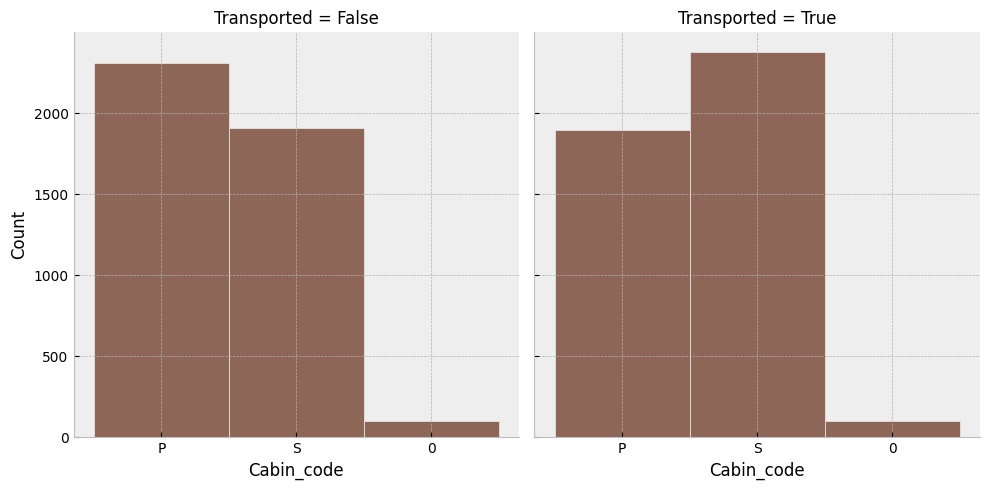

[114]


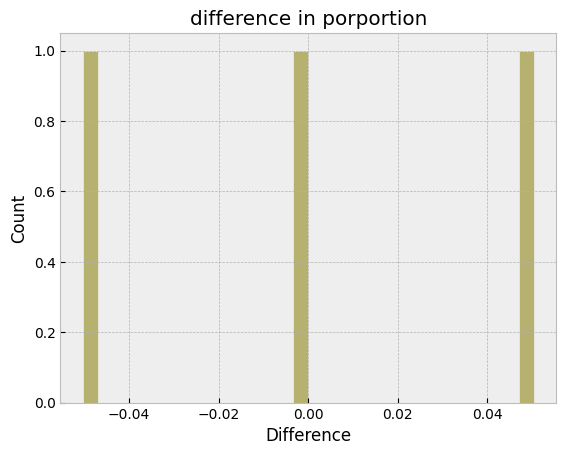

S         P         0
% Cabin_code Start     0.493270  0.483838  0.022892
% Cabin_code Transp'd  0.543627  0.433531  0.022841
Difference             0.050357 -0.050306 -0.000051

In [ ]:
dis_plot('Cabin_code')

[275]


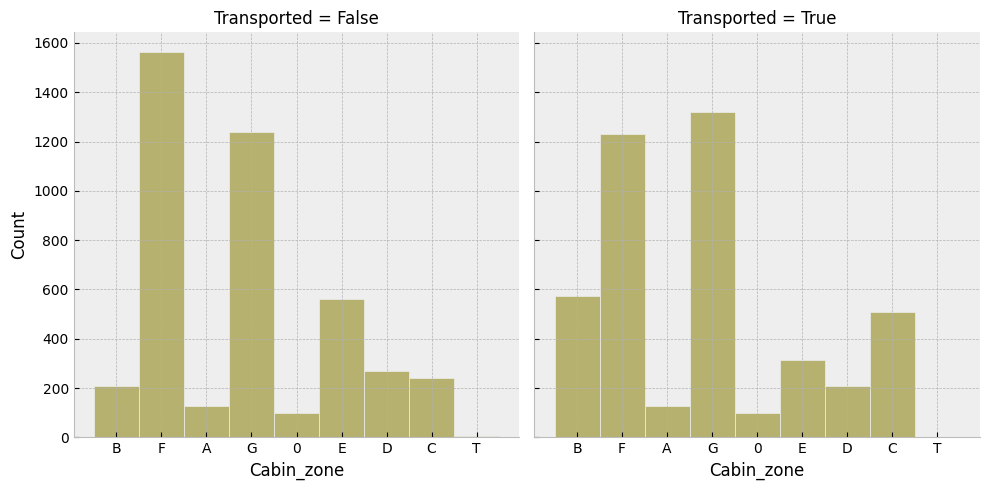

[46]


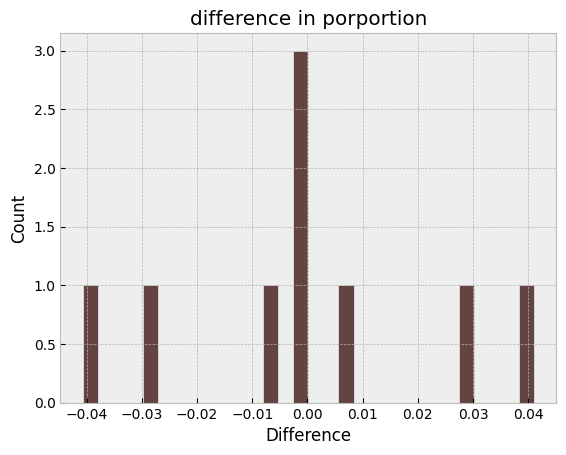

F         G         E         B         C  \
% Cabin_zone Start     0.321408  0.294375  0.100771  0.089612  0.085931   
% Cabin_zone Transp'd  0.280722  0.301736  0.071494  0.130653  0.116035   
Difference            -0.040686  0.007361 -0.029277  0.041041  0.030104   

                              D         A         0         T  
% Cabin_zone Start     0.054987  0.029449  0.022892  0.000575  
% Cabin_zone Transp'd  0.047282  0.029009  0.022841  0.000228  
Difference            -0.007705 -0.000440 -0.000051 -0.000347

In [ ]:
dis_plot('Cabin_zone')

**Observations**

+ Cabin_code - best chance of being transported was S
+ Cabin_zone - B, C show best chance of survival compared to those departing
  + Cabin_zone F increased chance of not being transported
+ G, A, 0, T - show almost no change - **Dimension reduction**

## Destination and Transported

[372]


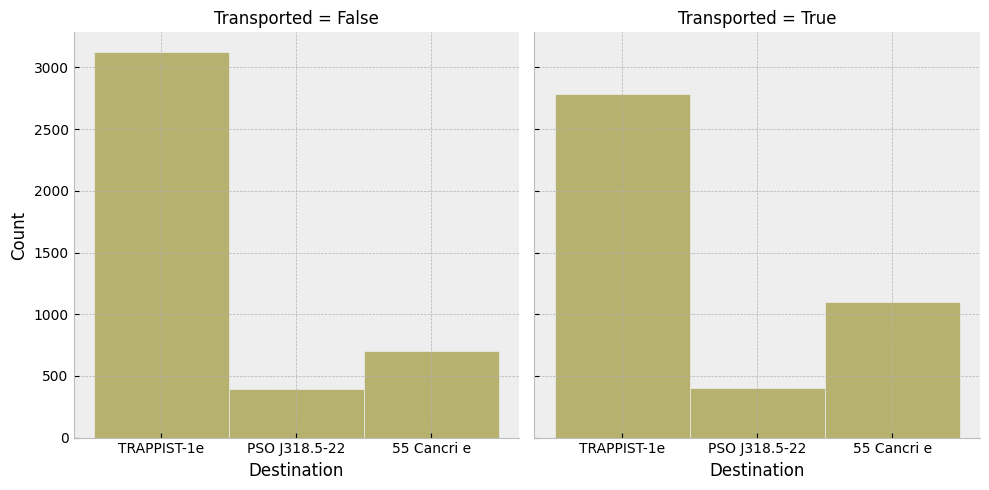

[175]


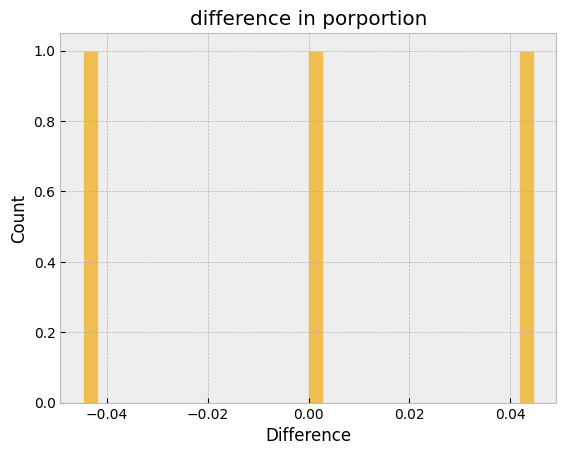

TRAPPIST-1e  55 Cancri e  PSO J318.5-22
% Destination Start        0.694983     0.211491       0.093526
% Destination Transp'd     0.650257     0.256183       0.093560
Difference                -0.044726     0.044692       0.000034

In [ ]:
dis_plot('Destination')

**Observations**

+ Those going to Trappist shows 4% less being transported compared to departure proportion
+ Those going to Cancri show 4% higher porportion being transported than departed

+ No change for PSO **Dimension Reduction**

## Age and Transported

In [ ]:
pd.set_option('display.max_columns', 1000)

[84]


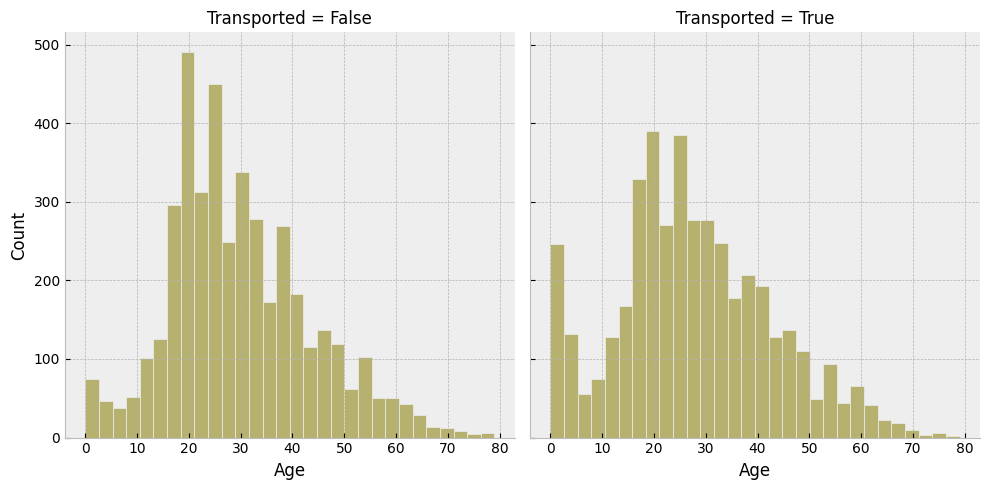

[241]


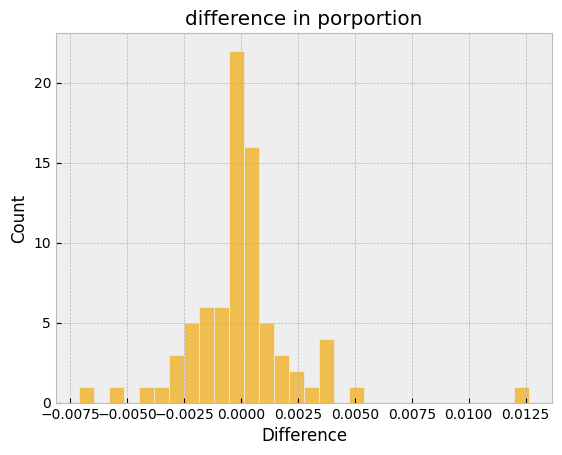

24.0      18.0      21.0      19.0      23.0      22.0  \
% Age Start     0.038055  0.037585  0.036528  0.034414  0.034296  0.034179   
% Age Transp'd  0.032649  0.037313  0.029384  0.032183  0.031950  0.031017   
Difference     -0.005406 -0.000272 -0.007144 -0.002231 -0.002347 -0.003162   

                    20.0      26.0      28.0      27.0      25.0      29.0  \
% Age Start     0.032535  0.031478  0.031360  0.030420  0.028541  0.027014   
% Age Transp'd  0.029384  0.029851  0.034981  0.029618  0.027285  0.026119   
Difference     -0.003150 -0.001627  0.003621 -0.000803 -0.001256 -0.000895   

                    31.0      32.0      30.0      33.0      36.0      0.0   \
% Age Start     0.023726  0.023373  0.021494  0.020907  0.020907  0.020907   
% Age Transp'd  0.019356  0.020289  0.019123  0.019356  0.020756  0.033582   
Difference     -0.004369 -0.003084 -0.002371 -0.001550 -0.000151  0.012675   

                    37.0      35.0      38.0      17.0      15.0      34.0  \
% Age Start     0.020789  0.020085  0.018910  0.018558  0.018205  0.017383   
% Age Transp'd  0.017257  0.020522  0.016558  0.020756  0.021222  0.017957   
Difference     -0.003532  0.000438 -0.002352  0.002198  0.003017  0.000574   

                    16.0      13.0      39.0      14.0      41.0      43.0  \
% Age Start     0.017266  0.016561  0.016209  0.016209  0.015152  0.015034   
% Age Transp'd  0.018657  0.016791  0.014459  0.017957  0.015625  0.015159   
Difference      0.001391  0.000230 -0.001750  0.001748  0.000473  0.000125   

                    40.0      42.0      44.0      46.0      45.0      47.0  \
% Age Start     0.015034  0.013977  0.013507  0.011393  0.010453  0.010336   
% Age Transp'd  0.017024  0.012360  0.014692  0.011194  0.009795  0.010961   
Difference      0.001990 -0.001617  0.001185 -0.000199 -0.000659  0.000625   

                    49.0      2.0       3.0       50.0      48.0      4.0   \
% Age Start     0.009749  0.008809  0.008809  0.008692  0.008457  0.008339   
% Age Transp'd  0.007929  0.012360  0.013759  0.008629  0.009095  0.012360   
Difference     -0.001820  0.003551  0.004950 -0.000063  0.000638  0.004021   

                    55.0      1.0       54.0      53.0      51.0      7.0   \
% Age Start     0.007987  0.007869  0.007869  0.007165  0.006930  0.006108   
% Age Transp'd  0.007463  0.011427  0.007463  0.006996  0.004897  0.007463   
Difference     -0.000524  0.003558 -0.000407 -0.000168 -0.002032  0.001355   

                    52.0      56.0      58.0      11.0      8.0       57.0  \
% Age Start     0.006108  0.005638  0.005520  0.005520  0.005403  0.005403   
% Age Transp'd  0.006530  0.005131  0.005597  0.006297  0.006063  0.005131   
Difference      0.000422 -0.000507  0.000077  0.000776  0.000661 -0.000272   

                    9.0       12.0      6.0       10.0      59.0      60.0  \
% Age Start     0.004933  0.004816  0.004698  0.004581  0.004111  0.003993   
% Age Transp'd  0.005597  0.006763  0.005364  0.005830  0.006297  0.003498   
Difference      0.000664  0.001947  0.000666  0.001250  0.002186 -0.000495   

                    5.0       61.0      64.0      62.0      63.0      65.0  \
% Age Start     0.003876  0.003759  0.003406  0.003054  0.003054  0.002701   
% Age Transp'd  0.004664  0.004198  0.003731  0.003032  0.002332  0.001632   
Difference      0.000788  0.000439  0.000325 -0.000022 -0.000722 -0.001069   

                    67.0      68.0      70.0      66.0      73.0      71.0  \
% Age Start     0.001527  0.001409  0.001057  0.000822  0.000822  0.000822   
% Age Transp'd  0.001632  0.001866  0.001399  0.000933  0.000233  0.000700   
Difference      0.000106  0.000456  0.000342  0.000111 -0.000589 -0.000123   

                    69.0      74.0      75.0      72.0      78.0      79.0  \
% Age Start     0.000705  0.000587  0.000470  0.000470  0.000352  0.000352   
% Age Transp'd  0.000233  0.000700  0.000466  0.000466  0.000233       NaN   
Difference     -0.000472  0.00

In [ ]:
dis_plot('Age')

**Observations**

+ Number of children Age 0 show drastic difference in the porportion Transported
  + children 1 - 4 show slight increase in proportion transported
  + over the Age of 60 shows no difference in proportion transported **Dimension Reduction**


## VIP and Transported

In [ ]:
# dis_plot('VIP')

## RoomService and Transported

[286]


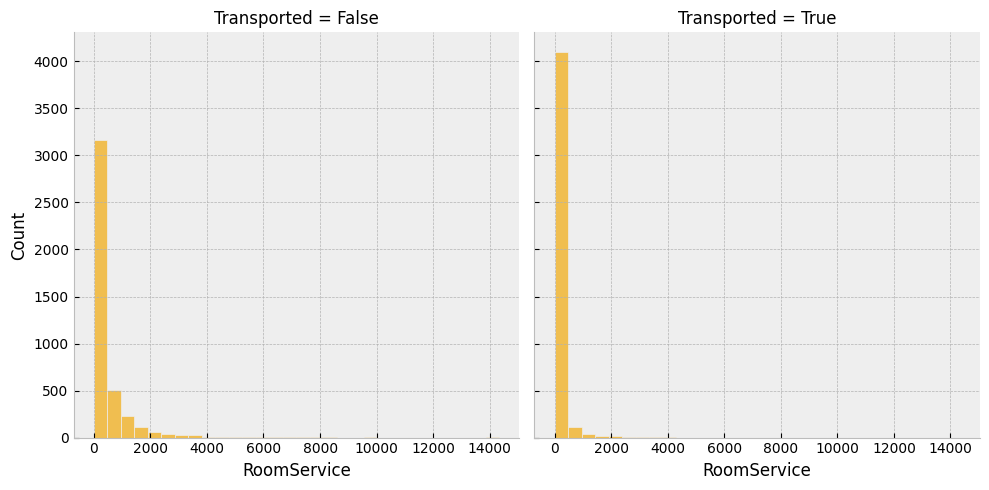

[376]


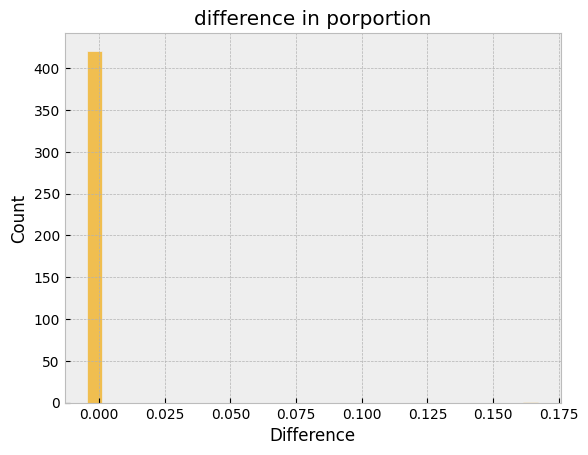

0.0       1.0       2.0       3.0       4.0      \
% RoomService Start     0.655193  0.013745  0.009281  0.007166  0.005522   
% RoomService Transp'd  0.822352  0.009313  0.007451  0.005588  0.002095   
Difference              0.167159 -0.004432 -0.001830 -0.001578 -0.003426   

                         5.0       9.0       8.0       6.0       14.0     \
% RoomService Start     0.003289  0.002937  0.002820  0.002820  0.002467   
% RoomService Transp'd  0.002794  0.001863  0.003958  0.001863  0.002328   
Difference             -0.000496 -0.001074  0.001139 -0.000957 -0.000139   

                         13.0      10.0      7.0       19.0      12.0     \
% RoomService Start     0.002115  0.001997  0.001997  0.001880  0.001880   
% RoomService Transp'd  0.000931  0.001630  0.000931  0.001164  0.000698   
Difference             -0.001183 -0.000367 -0.001066 -0.000716 -0.001181   

                         21.0      11.0      30.0      22.0      20.0     \
% RoomService Start     0.001645  0.001645  0.001527  0.001527  0.001527   
% RoomService Transp'd  0.001164  0.001164  0.001630  0.000698  0.000931   
Difference             -0.000481 -0.000481  0.000103 -0.000829 -0.000596   

                         42.0      27.0      18.0      28.0      32.0     \
% RoomService Start     0.001410  0.001410  0.001410  0.001292  0.001292   
% RoomService Transp'd  0.000931  0.001397  0.000698  0.000698  0.001630   
Difference             -0.000478 -0.000013 -0.000711 -0.000594  0.000338   

                         16.0      31.0      15.0      17.0      36.0     \
% RoomService Start     0.001175  0.001175  0.001175  0.001175  0.001057   
% RoomService Transp'd  0.001164  0.000698  0.000931  0.000931  0.000931   
Difference             -0.000011 -0.000476 -0.000243 -0.000243 -0.000126   

                         90.0      43.0      24.0      25.0      29.0     \
% RoomService Start     0.001057  0.001057  0.001057  0.001057  0.000940   
% RoomService Transp'd  0.000466  0.000466  0.000466  0.000466  0.000466   
Difference             -0.000592 -0.000592 -0.000592 -0.000592 -0.000474   

                         112.0     39.0      49.0      38.0      44.0     \
% RoomService Start     0.000940  0.000940  0.000940  0.000940  0.000822   
% RoomService Transp'd  0.000233  0.000698  0.000931  0.000466  0.000698   
Difference             -0.000707 -0.000241 -0.000009 -0.000474 -0.000124   

                         84.0      35.0      83.0      86.0      34.0     \
% RoomService Start     0.000822  0.000822  0.000822  0.000822  0.000822   
% RoomService Transp'd  0.000466  0.000931  0.000931  0.000698  0.000698   
Difference             -0.000357  0.000109  0.000109 -0.000124 -0.000124   

                         26.0      37.0      158.0     89.0      41.0     \
% RoomService Start     0.000822  0.000822  0.000822  0.000705  0.000705   
% RoomService Transp'd  0.000698  0.001397  0.000698  0.000931  0.000466   
Difference             -0.000124  0.000575 -0.000124  0.000226 -0.000239   

                         48.0      324.0     46.0      45.0      65.0     \
% RoomService Start     0.000705  0.000705  0.000705  0.000705  0.000705   
% RoomService Transp'd  0.000233  0.000233  0.000466  0.000233  0.000698   
Difference             -0.000472 -0.000472 -0.000239 -0.000472 -0.000006   

                         40.0      59.0      139.0     56.0      23.0     \
% RoomService Start     0.000705  0.000705  0.000705  0.000705  0.000705   
% RoomService Transp'd  0.000698       NaN  0.000466  0.000233  0.000233   
Difference             -0.000006       NaN -0.000239 -0.000472 -0.000472   

                         77.0      55.0      51.0      33.0      552.0    \
% RoomService Start     0.000705  0.000705  0.000705  0.000705  0.000587   
% RoomService Transp'd  0.000233  0.000466  0.000931  0.000698  0.000233   
Difference             -0.000472 -0.000239  0.000226 -0.000006 -0.000355   

                         172.0     98.0      142.0     381.0

In [ ]:
dis_plot('RoomService')

**Observations**

+ Those that didn't use RoomService show a 16% greater proportion being transported.
  + no affect for any amount of of RoomService usage. **Dimension Reduction**

## FoodCourt and Transported

[265]


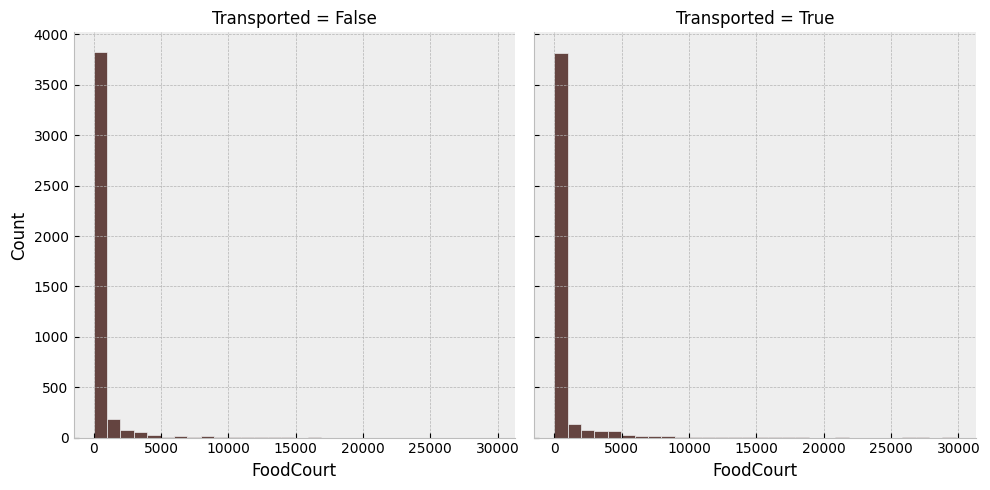

[163]


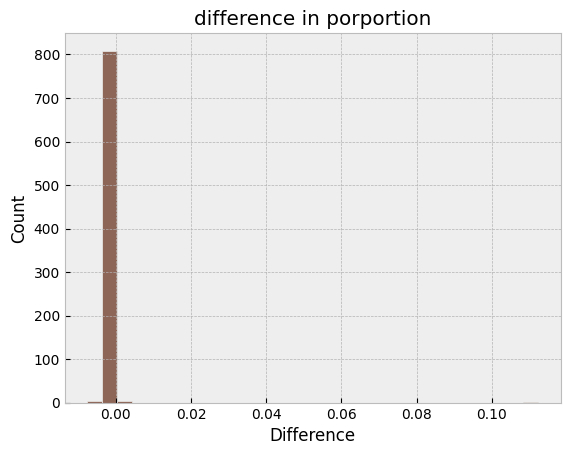

0.0       1.0       2.0       3.0       4.0      \
% FoodCourt Start     0.641128  0.013631  0.008813  0.006228  0.006228   
% FoodCourt Transp'd  0.753447  0.006076  0.003739  0.002337  0.002571   
Difference            0.112319 -0.007555 -0.005074 -0.003891 -0.003657   

                       5.0       6.0       9.0       7.0       10.0     \
% FoodCourt Start     0.003878  0.003643  0.003290  0.003173  0.003173   
% FoodCourt Transp'd  0.001402  0.001870  0.001402  0.001402  0.000467   
Difference           -0.002476 -0.001773 -0.001888 -0.001771 -0.002705   

                       8.0       11.0      25.0      20.0      16.0     \
% FoodCourt Start     0.002350  0.002233  0.002115  0.002115  0.001880   
% FoodCourt Transp'd  0.001402  0.001402  0.000467  0.000467  0.000467   
Difference           -0.000948 -0.000830 -0.001648 -0.001648 -0.001413   

                       21.0      13.0      22.0      12.0      33.0     \
% FoodCourt Start     0.001880  0.001763  0.001645  0.001645  0.001410   
% FoodCourt Transp'd  0.000701  0.000701  0.000701  0.000935  0.000467   
Difference           -0.001179 -0.001062 -0.000944 -0.000710 -0.000943   

                       18.0      30.0      17.0      53.0      15.0     \
% FoodCourt Start     0.001410  0.001410  0.001293  0.001293  0.001293   
% FoodCourt Transp'd  0.000935  0.001168  0.000701  0.000467  0.000467   
Difference           -0.000475 -0.000242 -0.000591 -0.000825 -0.000825   

                       44.0      31.0      14.0      32.0      29.0     \
% FoodCourt Start     0.001293  0.001293  0.001293  0.001175  0.001058   
% FoodCourt Transp'd  0.000467  0.000467  0.000467  0.000234  0.000234   
Difference           -0.000825 -0.000825 -0.000825 -0.000941 -0.000824   

                       79.0      43.0     34.0      56.0      83.0     \
% FoodCourt Start     0.001058  0.000940  0.00094  0.000823  0.000823   
% FoodCourt Transp'd  0.000234  0.000234      NaN  0.000467  0.000234   
Difference           -0.000824 -0.000706      NaN -0.000355 -0.000589   

                       38.0      37.0      59.0      19.0      46.0     \
% FoodCourt Start     0.000823  0.000823  0.000823  0.000823  0.000823   
% FoodCourt Transp'd       NaN  0.000234  0.000467  0.000467  0.000234   
Difference                 NaN -0.000589 -0.000355 -0.000355 -0.000589   

                       36.0      82.0      28.0      104.0     35.0     \
% FoodCourt Start     0.000823  0.000823  0.000823  0.000823  0.000705   
% FoodCourt Transp'd  0.000234  0.000234  0.000234  0.001168  0.000467   
Difference           -0.000589 -0.000589 -0.000589  0.000346 -0.000238   

                       84.0      51.0      132.0     243.0     809.0    \
% FoodCourt Start     0.000705  0.000705  0.000705  0.000705  0.000705   
% FoodCourt Transp'd  0.000467  0.000234  0.000234  0.000234  0.000467   
Difference           -0.000238 -0.000471 -0.000471 -0.000471 -0.000238   

                       76.0      24.0      89.0      122.0     225.0    \
% FoodCourt Start     0.000705  0.000705  0.000588  0.000588  0.000588   
% FoodCourt Transp'd  0.000234  0.000234  0.000234       NaN  0.000234   
Difference           -0.000471 -0.000471 -0.000354       NaN -0.000354   

                       40.0      760.0     94.0      172.0     93.0     \
% FoodCourt Start     0.000588  0.000588  0.000588  0.000588  0.000588   
% FoodCourt Transp'd  0.000234       NaN  0.000467  0.000467  0.000467   
Difference           -0.000354       NaN -0.000120 -0.000120 -0.000120   

                       27.0      45.0      162.0     169.0     60.0     \
% FoodCourt Start     0.000588  0.000588  0.000588  0.000588  0.000588   
% FoodCourt Transp'd       NaN  0.000234  0.000701  0.000467       NaN   
Difference                 NaN -0.000354  0.000114 -0.000120       NaN   

                       103.0     47.0      100.0     179.0     226.0    \
% FoodCourt Start     0.000588  0.000588  0.000588  0.000588  0.000588   
% FoodCourt Transp

In [ ]:
dis_plot('FoodCourt')

**Observations**

+ Those who did not go to the FoodCourt show a much higher portion being transported.
  + No noticable affect for any other amount. **Dimension Reduction**

## ShoppingMall and Transported

[142]


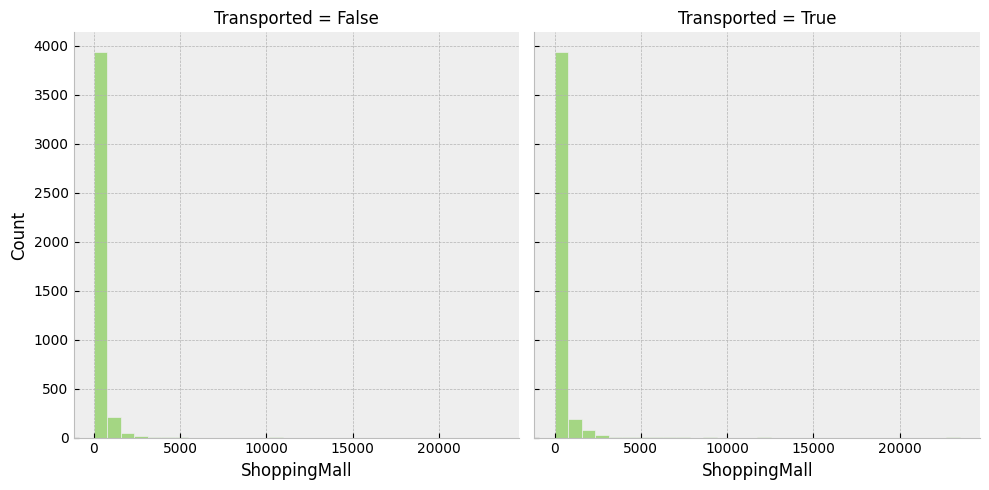

[268]


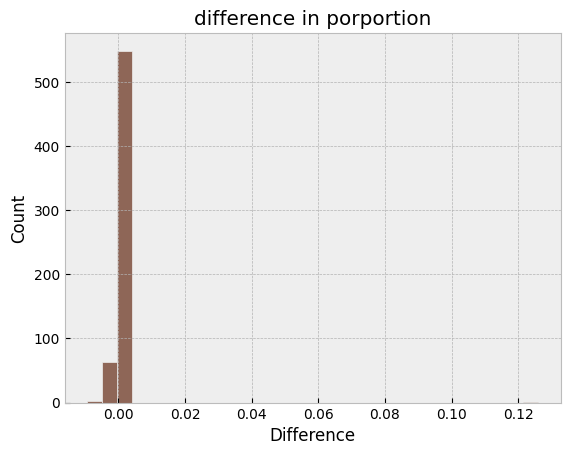

0.0       1.0       2.0       3.0       4.0      \
% ShoppingMall Start     0.658456  0.018032  0.009428  0.006953  0.005303   
% ShoppingMall Transp'd  0.784475  0.008677  0.004456  0.004221  0.002111   
Difference               0.126019 -0.009355 -0.004972 -0.002732 -0.003193   

                          5.0       7.0       6.0       13.0      9.0      \
% ShoppingMall Start     0.004478  0.004243  0.004007  0.003418  0.003300   
% ShoppingMall Transp'd  0.003049  0.002345  0.001642  0.002111  0.002111   
Difference              -0.001430 -0.001898 -0.002365 -0.001307 -0.001189   

                          8.0       10.0      23.0      11.0      31.0     \
% ShoppingMall Start     0.003300  0.003182  0.002475  0.002475  0.002357   
% ShoppingMall Transp'd  0.001173  0.000704  0.001173  0.000469  0.001642   
Difference              -0.002127 -0.002479 -0.001302 -0.002006 -0.000715   

                          17.0      12.0      14.0      15.0      22.0     \
% ShoppingMall Start     0.002239  0.002121  0.002004  0.001768  0.001768   
% ShoppingMall Transp'd  0.000938  0.000938  0.000704  0.000938  0.000704   
Difference              -0.001301 -0.001183 -0.001300 -0.000830 -0.001064   

                          16.0      32.0      46.0      18.0      21.0     \
% ShoppingMall Start     0.001768  0.001768  0.001650  0.001650  0.001650   
% ShoppingMall Transp'd  0.000704  0.000469  0.000469  0.001173  0.000704   
Difference              -0.001064 -0.001299 -0.001181 -0.000477 -0.000946   

                          20.0      51.0      47.0      19.0      26.0     \
% ShoppingMall Start     0.001296  0.001296  0.001296  0.001296  0.001296   
% ShoppingMall Transp'd  0.000235  0.000938  0.000704       NaN  0.000235   
Difference              -0.001062 -0.000358 -0.000593       NaN -0.001062   

                          29.0      33.0      30.0      25.0      49.0     \
% ShoppingMall Start     0.001179  0.001179  0.001179  0.001179  0.001179   
% ShoppingMall Transp'd  0.000469  0.000938  0.000235  0.000704  0.000235   
Difference              -0.000710 -0.000240 -0.000944 -0.000475 -0.000944   

                          50.0      28.0      38.0      36.0      80.0     \
% ShoppingMall Start     0.001179  0.001179  0.001061  0.001061  0.001061   
% ShoppingMall Transp'd  0.000235  0.000235  0.000235  0.000235  0.000469   
Difference              -0.000944 -0.000944 -0.000826 -0.000826 -0.000592   

                          81.0      60.0      40.0      97.0      39.0     \
% ShoppingMall Start     0.000943  0.000943  0.000943  0.000943  0.000943   
% ShoppingMall Transp'd  0.000235  0.000469  0.000235  0.000235  0.000938   
Difference              -0.000708 -0.000474 -0.000708 -0.000708 -0.000005   

                          82.0      54.0      34.0      37.0      53.0     \
% ShoppingMall Start     0.000943  0.000825  0.000825  0.000825  0.000825   
% ShoppingMall Transp'd  0.000469  0.000235  0.000235  0.000469  0.000235   
Difference              -0.000474 -0.000590 -0.000590 -0.000356 -0.000590   

                          43.0      136.0     52.0      137.0     27.0     \
% ShoppingMall Start     0.000707  0.000707  0.000707  0.000707  0.000707   
% ShoppingMall Transp'd  0.000469  0.000235  0.000235  0.000235  0.000235   
Difference              -0.000238 -0.000473 -0.000473 -0.000473 -0.000473   

                          84.0      71.0      74.0      95.0      45.0     \
% ShoppingMall Start     0.000707  0.000707  0.000707  0.000707  0.000707   
% ShoppingMall Transp'd  0.000235  0.000235  0.000469       NaN       NaN   
Difference              -0.000473 -0.000473 -0.000238       NaN       NaN   

                          44.0      89.0      41.0      61.0      72.0     \
% ShoppingMall Start     0.000707  0.000707  0.000707  0.000707  0.000707   
% ShoppingMall Transp'd  0.000235  0.000704  0.000235  0.000235  0.000469   
Difference              -0.000473 -0.000004 -0.000473 -0.000473 -0.000238   

         

In [ ]:
dis_plot('ShoppingMall')

**Observations**

+ Those who did not go to the ShoppingMall show a 12% greater proportion being transported
 + High proportion of those above 100 visits didn't get transported **Dimension Reduction**

## Spa and Transported

[375]


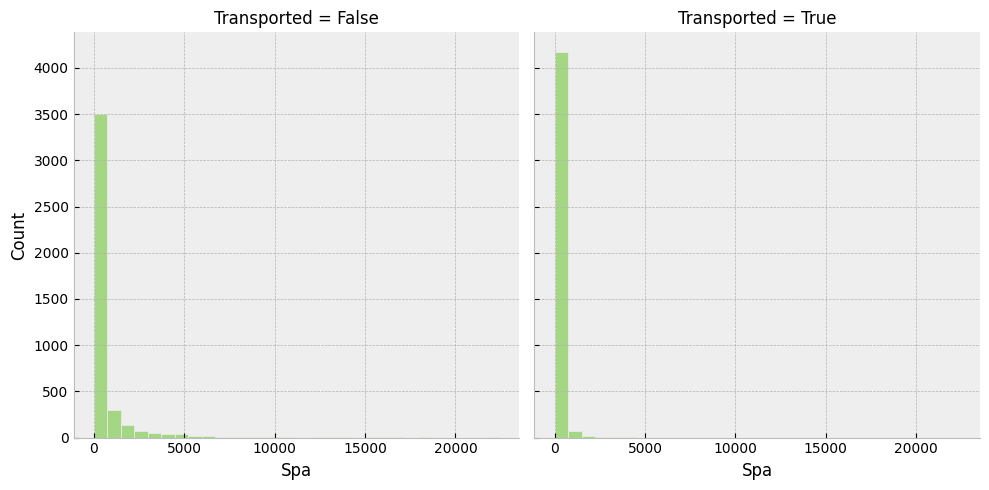

[408]


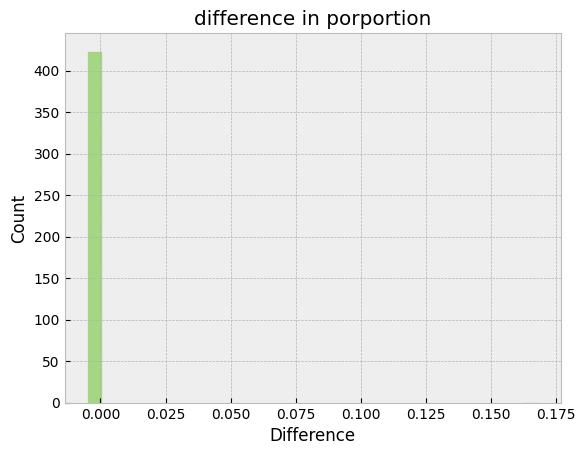

0.0       1.0       2.0       5.0       3.0       4.0      \
% Spa Start     0.625617  0.017156  0.012338  0.006228  0.006228  0.005405   
% Spa Transp'd  0.793795  0.012130  0.010963  0.006531  0.005598  0.003965   
Difference      0.168178 -0.005027 -0.001375  0.000303 -0.000630 -0.001440   

                 7.0       6.0       9.0       8.0       10.0      12.0     \
% Spa Start     0.003995  0.003878  0.003290  0.003290  0.002938  0.002820   
% Spa Transp'd  0.003499  0.003266  0.001400  0.002333  0.002799  0.002333   
Difference     -0.000496 -0.000612 -0.001891 -0.000958 -0.000139 -0.000488   

                 11.0      20.0      15.0      16.0      22.0      14.0     \
% Spa Start     0.002585  0.002585  0.001998  0.001998  0.001998  0.001998   
% Spa Transp'd  0.001866  0.001633  0.001400  0.000933  0.001400  0.000700   
Difference     -0.000719 -0.000952 -0.000598 -0.001065 -0.000598 -0.001298   

                 19.0      13.0      17.0      59.0      21.0      26.0     \
% Spa Start     0.001880  0.001880  0.001763  0.001763  0.001645  0.001528   
% Spa Transp'd  0.000933  0.001866  0.001633  0.000700  0.000933  0.000933   
Difference     -0.000947 -0.000014 -0.000130 -0.001063 -0.000712 -0.000595   

                 38.0      31.0      36.0      30.0      49.0      18.0     \
% Spa Start     0.001528  0.001410  0.001410  0.001293  0.001175  0.001175   
% Spa Transp'd  0.000700  0.000933  0.001866  0.000700  0.000933  0.001166   
Difference     -0.000828 -0.000477  0.000456 -0.000593 -0.000242 -0.000009   

                 43.0      87.0      27.0      25.0      40.0      148.0    \
% Spa Start     0.001175  0.001175  0.001175  0.001175  0.001058  0.001058   
% Spa Transp'd  0.000933  0.000467  0.001166  0.000700  0.000467  0.000233   
Difference     -0.000242 -0.000709 -0.000009 -0.000475 -0.000591 -0.000824   

                 62.0      24.0      56.0      33.0      48.0      35.0     \
% Spa Start     0.001058  0.001058  0.001058  0.001058  0.001058  0.001058   
% Spa Transp'd  0.000933  0.000933  0.001400  0.000700  0.000933  0.001400   
Difference     -0.000125 -0.000125  0.000342 -0.000358 -0.000125  0.000342   

                 29.0      39.0      58.0      51.0      71.0      34.0     \
% Spa Start     0.000940  0.000940  0.000940  0.000940  0.000940  0.000940   
% Spa Transp'd  0.000933  0.000467  0.000467  0.000467  0.000933  0.000933   
Difference     -0.000007 -0.000474 -0.000474 -0.000474 -0.000007 -0.000007   

                 102.0     104.0     318.0     42.0      52.0      117.0    \
% Spa Start     0.000940  0.000823  0.000823  0.000823  0.000823  0.000823   
% Spa Transp'd  0.000933  0.000700  0.000467  0.000467  0.000233  0.000700   
Difference     -0.000007 -0.000123 -0.000356 -0.000356 -0.000589 -0.000123   

                 140.0     68.0      50.0      41.0      74.0      304.0    \
% Spa Start     0.000823  0.000823  0.000823  0.000823  0.000823  0.000823   
% Spa Transp'd       NaN  0.000467  0.000700  0.000467  0.000233  0.000233   
Difference           NaN -0.000356 -0.000123 -0.000356 -0.000589 -0.000589   

                 61.0      80.0      32.0      37.0      136.0     110.0    \
% Spa Start     0.000823  0.000823  0.000823  0.000823  0.000705  0.000705   
% Spa Transp'd  0.000700  0.000467  0.000233  0.000233  0.000233  0.000467   
Difference     -0.000123 -0.000356 -0.000589 -0.000589 -0.000472 -0.000239   

                 85.0      45.0      594.0     280.0     44.0      46.0     \
% Spa Start     0.000705  0.000705  0.000705  0.000705  0.000705  0.000705   
% Spa Transp'd  0.000467  0.000467  0.000233  0.000233  0.000467  0.000467   
Difference     -0.000239 -0.000239 -0.000472 -0.000472 -0.000239 -0.000239   

                 28.0      55.0      795.0     112.0     54.0      207.0    \
% Spa Start     0.000705  0.000705  0.000705  0.000705  0.000705  0.000705   
% Spa Transp'd  0.000467  0.000233  0.000700  0.000933  0.000233  0.000467   
Difference     -0.000239 -0

In [ ]:
dis_plot('Spa')

**Observations**

+ No vists to SPA represented a 16% increase in chance of being Transported  **Dimension Reduction**

## VRDeck and Transported

[34]


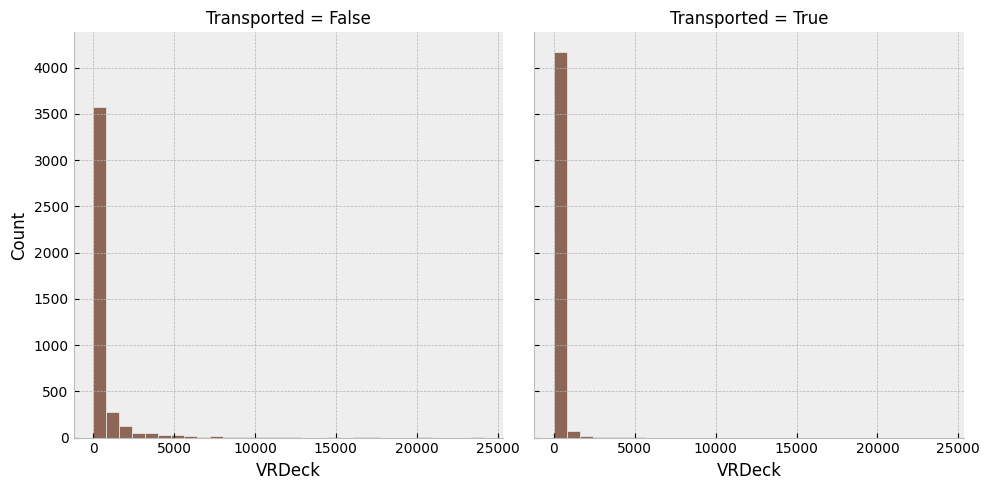

[122]


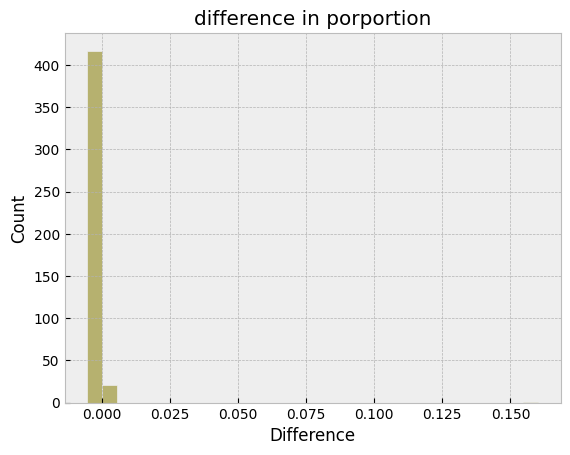

0.0       1.0       2.0       3.0       5.0       4.0      \
% VRDeck Start     0.646091  0.016343  0.008230  0.006584  0.005996  0.005526   
% VRDeck Transp'd  0.806308  0.010981  0.006776  0.003972  0.004673  0.004439   
Difference         0.160218 -0.005362 -0.001455 -0.002612 -0.001324 -0.001087   

                    6.0       8.0      7.0       9.0       12.0      10.0     \
% VRDeck Start     0.003762  0.003527  0.00341  0.002939  0.002587  0.002587   
% VRDeck Transp'd  0.003738  0.003037  0.00257  0.002570  0.001869  0.001636   
Difference        -0.000024 -0.000490 -0.00084 -0.000369 -0.000718 -0.000951   

                    13.0      16.0      23.0      11.0      15.0      19.0     \
% VRDeck Start     0.002352  0.002234  0.002116  0.001999  0.001881  0.001764   
% VRDeck Transp'd  0.001636  0.001168  0.001636  0.001168  0.001402  0.000935   
Difference        -0.000716 -0.001066 -0.000481 -0.000831 -0.000479 -0.000829   

                    18.0      17.0      25.0      26.0      40.0      21.0     \
% VRDeck Start     0.001764  0.001646  0.001646  0.001529  0.001529  0.001529   
% VRDeck Transp'd  0.001168  0.001168  0.000701  0.000935  0.001636  0.000935   
Difference        -0.000595 -0.000478 -0.000945 -0.000594  0.000107 -0.000594   

                    14.0      22.0      44.0      27.0      52.0      20.0     \
% VRDeck Start     0.001411  0.001293  0.001176  0.001176  0.001176  0.001176   
% VRDeck Transp'd  0.000701  0.000467  0.000701  0.000701  0.001402  0.000234   
Difference        -0.000710 -0.000826 -0.000475 -0.000475  0.000226 -0.000942   

                    77.0      39.0      67.0      57.0      24.0      30.0     \
% VRDeck Start     0.001176  0.001058  0.001058  0.001058  0.001058  0.001058   
% VRDeck Transp'd  0.000701  0.000935  0.000701  0.000935  0.000234  0.000701   
Difference        -0.000475 -0.000124 -0.000357 -0.000124 -0.000825 -0.000357   

                    29.0      41.0      32.0      62.0      61.0      86.0     \
% VRDeck Start     0.001058  0.001058  0.000941  0.000941  0.000941  0.000941   
% VRDeck Transp'd  0.000935  0.000701  0.001402  0.000935  0.000467  0.000935   
Difference        -0.000124 -0.000357  0.000461 -0.000006 -0.000473 -0.000006   

                    85.0      31.0      55.0      74.0      124.0     50.0     \
% VRDeck Start     0.000941  0.000941  0.000941  0.000941  0.000823  0.000823   
% VRDeck Transp'd  0.000701  0.001402  0.000234  0.000935  0.000467  0.000935   
Difference        -0.000240  0.000461 -0.000707 -0.000006 -0.000356  0.000112   

                    100.0     79.0      35.0      68.0      34.0      64.0     \
% VRDeck Start     0.000823  0.000823  0.000823  0.000823  0.000823  0.000823   
% VRDeck Transp'd  0.000701  0.000701  0.000701  0.000467  0.000234  0.000234   
Difference        -0.000122 -0.000122 -0.000122 -0.000356 -0.000589 -0.000589   

                    89.0      60.0      53.0      42.0      119.0     37.0     \
% VRDeck Start     0.000823  0.000823  0.000823  0.000823  0.000823  0.000823   
% VRDeck Transp'd  0.000234  0.000234  0.000467  0.000701  0.000467  0.000467   
Difference        -0.000589 -0.000589 -0.000356 -0.000122 -0.000356 -0.000356   

                    46.0      754.0     47.0      28.0      71.0      54.0     \
% VRDeck Start     0.000705  0.000705  0.000705  0.000705  0.000705  0.000705   
% VRDeck Transp'd  0.000701  0.000234  0.000467  0.000234  0.000701  0.000234   
Difference        -0.000005 -0.000472 -0.000238 -0.000472 -0.000005 -0.000472   

                    43.0      72.0      33.0      84.0      168.0     36.0     \
% VRDeck Start     0.000705  0.000705  0.000705  0.000705  0.000588  0.000588   
% VRDeck Transp'd  0.000467  0.000234  0.001168  0.000935  0.000467  0.000701   
Difference        -0.000238 -0.000472  0.000463  0.000229 -0.000121  0.000113   

                    341.0     213.0     56.0      214.0     337.0     91.0     \
% VRDeck Start     0.000588  0.000588  0.00

In [ ]:
dis_plot('VRDeck')

**Observations**

+ Those who did not vist the VRDeck show a 16% increased chance of being Transported


**Feature Cross of 0 Visits to multiple amenities**

## EDA - Summary

### HomePlanet
+ Those transported is more equally weighted between HomePlanets, than departed.
  + **People from Earth were transported 8% less**
  + **People from Europa were transported 8% more**

### Cabin
+ Cabin_code - best chance of being transported was S
+ Cabin_zone - B, C show best chance of survival compared to those departing
  + Cabin_zone F increased chance of not being transported
+ G, A, 0, T - show almost no change - **Dimension reduction**

### Destination
+ Those going to Trappist shows 4% less being transported compared to departure proportion
+ Those going to Cancri show 4% higher porportion being transported than departed
  + No change for PSO **Dimension Reduction**

### Age
+ Number of children Age 0 show drastic difference in the porportion Transported
  + children 1 - 4 show slight increase in proportion transported
  + over the Age of 60 shows no difference in proportion transported **outlier**

### RoomService
+ Those that didn't use RoomService show a 16% greater proportion being transported.
  + no affect for any amount of of RoomService usage. **Dimension Reduction**

### FoodCourt
+ Those who did not go to the FoodCourt show a much higher portion being transported.
  + No noticable affect for any other amount. **Dimension Reduction**

### Spa
+ No vists to SPA represented a 16% increase in chance of being Transported  **Dimension Reduction**

### VRDeck
+ Those who did not vist the VRDeck show a 16% increased chance of being Transported

### Feature Cross
**Feature Cross of 0 Visits to multiple amenities**

# Preprocessing

## Null Values

In [ ]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin             0
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
Cabin_zone        0
Cabin_code        0
dtype: int64

In [ ]:
df[(df['HomePlanet'].isnull()) & (df['CryoSleep'].isnull())]

PassengerId HomePlanet CryoSleep        Cabin  Destination   Age    VIP  \
3622     3896_01        NaN       NaN  [C, 140, S]  55 Cancri e  18.0  False   
7218     7711_01        NaN       NaN  [D, 241, P]  TRAPPIST-1e  24.0  False   

      RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
3622          0.0     4387.0           0.0  2241.0     0.0     Ainoxa Preeldy   
7218          0.0       82.0           0.0  1624.0    77.0  Jihoton Muspereed   

      Transported Cabin_zone Cabin_code  
3622         True          C          S  
7218        False          D          P

In [ ]:
df[(df['HomePlanet'].isnull()) & (df['CryoSleep'].isnull())].index

Int64Index([3622, 7218], dtype='int64')

In [ ]:
df[(df['HomePlanet'].isnull()) & (df['CryoSleep'].isnull()) & (df['Cabin'].isnull())]

Empty DataFrame
Columns: [PassengerId, HomePlanet, CryoSleep, Cabin, Destination, Age, VIP, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck, Name, Transported, Cabin_zone, Cabin_code]
Index: []

In [ ]:
inds_drop = []
for col1 in df.columns:
  for col2 in df.columns:
    if col1 != col2:
      for col3 in df.columns:
        if col2 != col3:
          inds = df[(df[col1].isnull()) & (df[col2].isnull()) & (df[col3].isnull())].index
          print(col1,col2,col3,inds)
          for i in inds:
            inds_drop.append(i)
len(inds_drop)

PassengerId HomePlanet PassengerId Int64Index([], dtype='int64')
PassengerId HomePlanet CryoSleep Int64Index([], dtype='int64')
PassengerId HomePlanet Cabin Int64Index([], dtype='int64')
PassengerId HomePlanet Destination Int64Index([], dtype='int64')
PassengerId HomePlanet Age Int64Index([], dtype='int64')
PassengerId HomePlanet VIP Int64Index([], dtype='int64')
PassengerId HomePlanet RoomService Int64Index([], dtype='int64')
PassengerId HomePlanet FoodCourt Int64Index([], dtype='int64')
PassengerId HomePlanet ShoppingMall Int64Index([], dtype='int64')
PassengerId HomePlanet Spa Int64Index([], dtype='int64')
PassengerId HomePlanet VRDeck Int64Index([], dtype='int64')
PassengerId HomePlanet Name Int64Index([], dtype='int64')
PassengerId HomePlanet Transported Int64Index([], dtype='int64')
PassengerId HomePlanet Cabin_zone Int64Index([], dtype='int64')
PassengerId HomePlanet Cabin_code Int64Index([], dtype='int64')
PassengerId CryoSleep PassengerId Int64Index([], dtype='int64')
Passenge

488

In [ ]:
print(df.shape)
df = df.drop(inds_drop)
df.shape

(8693, 16)


(8509, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8509 entries, 0 to 8692
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8509 non-null   object 
 1   HomePlanet    8340 non-null   object 
 2   CryoSleep     8336 non-null   object 
 3   Cabin         8509 non-null   object 
 4   Destination   8362 non-null   object 
 5   Age           8356 non-null   float64
 6   VIP           8339 non-null   object 
 7   RoomService   8356 non-null   float64
 8   FoodCourt     8363 non-null   float64
 9   ShoppingMall  8343 non-null   float64
 10  Spa           8355 non-null   float64
 11  VRDeck        8354 non-null   float64
 12  Name          8350 non-null   object 
 13  Transported   8509 non-null   bool   
 14  Cabin_zone    8509 non-null   object 
 15  Cabin_code    8509 non-null   object 
dtypes: bool(1), float64(6), object(9)
memory usage: 1.0+ MB


In [ ]:
df['Cabin'].value_counts().index

Index([             ['0'],  ['G', '734', 'S'], ['G', '1368', 'P'],
        ['C', '137', 'S'],   ['B', '11', 'S'],  ['G', '981', 'S'],
        ['B', '201', 'P'],  ['D', '176', 'S'], ['G', '1476', 'S'],
         ['E', '13', 'S'],
       ...
        ['G', '543', 'S'],  ['G', '559', 'P'],  ['G', '558', 'P'],
        ['F', '701', 'P'],  ['G', '547', 'S'],  ['G', '557', 'P'],
        ['G', '556', 'P'],  ['E', '231', 'S'],  ['G', '545', 'S'],
        ['E', '290', 'P']],
      dtype='object', length=6450)

In [ ]:
for feat in df.columns[:-2]: #not cabin
  if feat not in ['Cabin', 'Cabin_zone', 'Cabin_code']:
    if df[feat].dtype == 'float':
      df[feat] = df[feat].fillna(df[feat].median())
    elif df[feat].dtype == 'object':
      # print(feat)
      # print(df[feat].value_counts().index[0])
      df[feat] = df[feat].fillna(df[feat].value_counts().index[0])

In [ ]:
df.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
Cabin_zone      0
Cabin_code      0
dtype: int64

## Treating Outliers

+ Age - semi-normal distribution with tail on right side. Treat outliers



+ RoomService - **Outliers on right hand side**

+ FoodCourt - **Outliers on right hand side**

+ ShoppingMall - **Outliers on right hand side**

+ Spa - **Outliers on right hand side**

+ VRDeck - **Outliers on right hand side**

def hist_plot

### Age

[394]


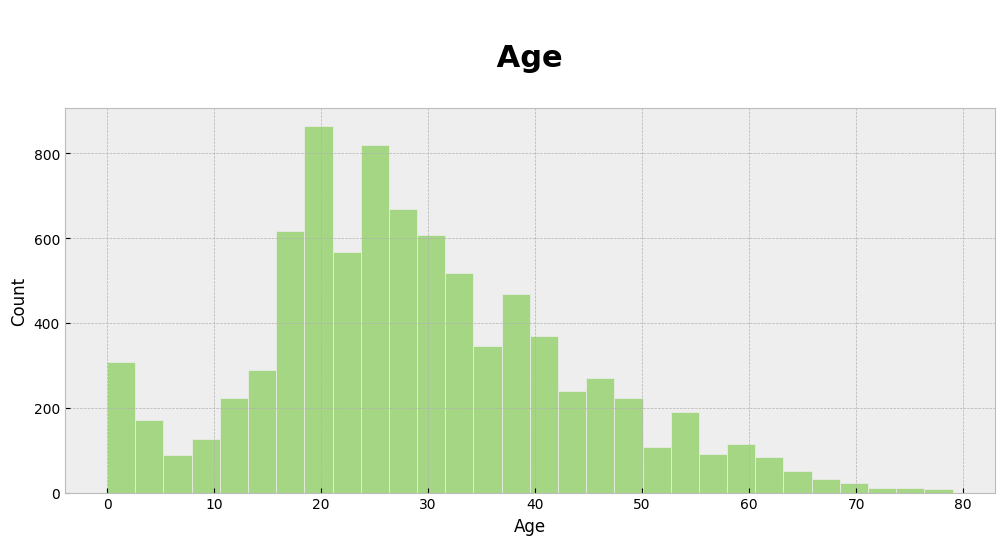

In [ ]:
hist_plot('Age')

In [ ]:
df['Age'] = df['Age'].clip(upper=62)

[192]


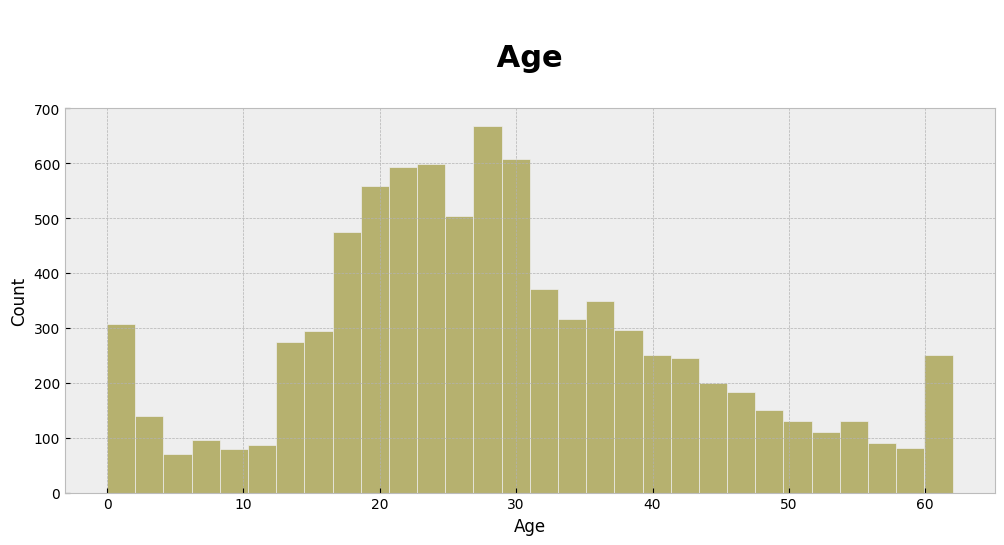

In [ ]:
hist_plot('Age')

### RoomService

[296]


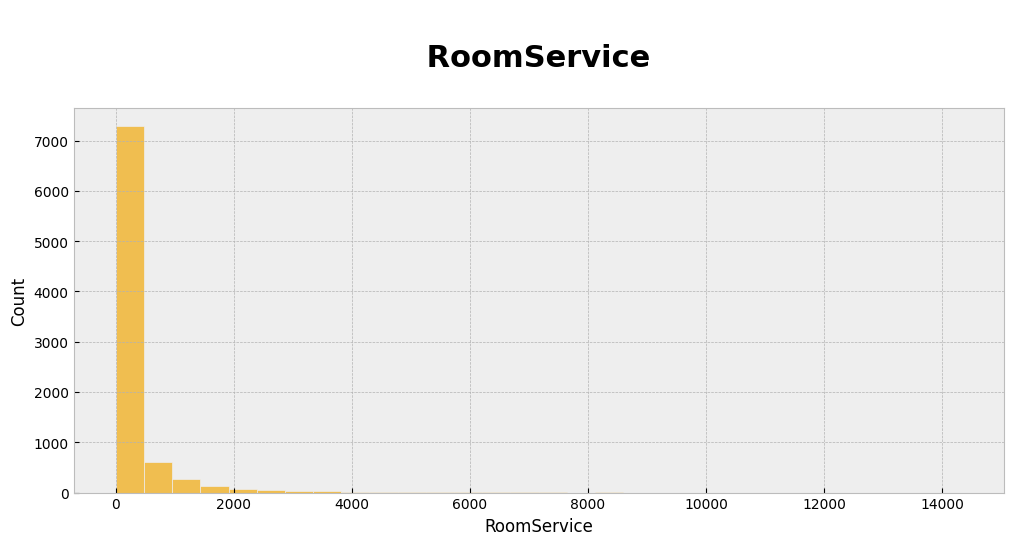

In [ ]:
hist_plot('RoomService')

In [ ]:
df['RoomService_cut'] = df['RoomService'].clip(upper=62)

[355]


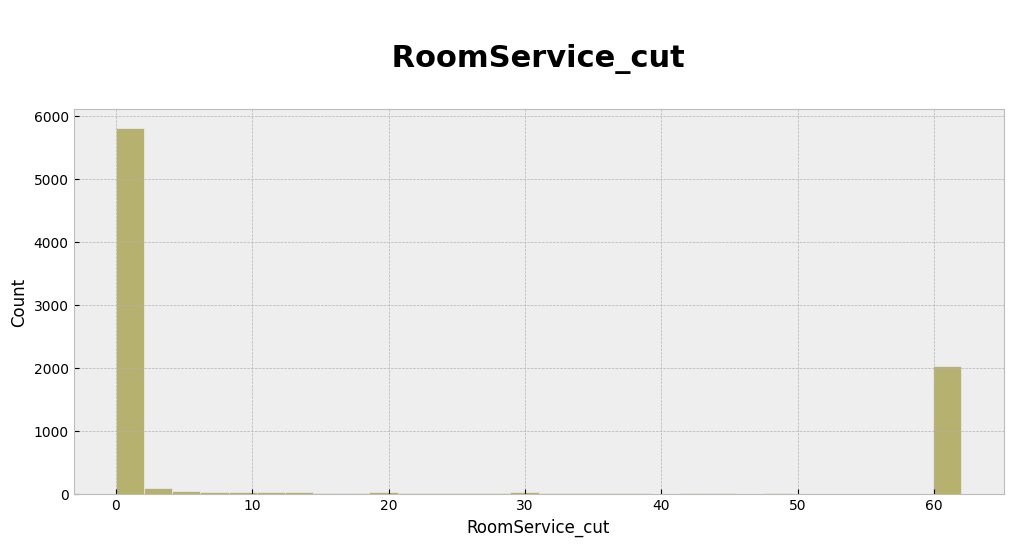

In [ ]:
hist_plot('RoomService_cut')

In [ ]:
df['RoomService_bin'] = pd.cut(df['RoomService'], bins=[-1,1,500, 16000], labels=['a', 'b', 'c'])

In [ ]:
count_plot?

197


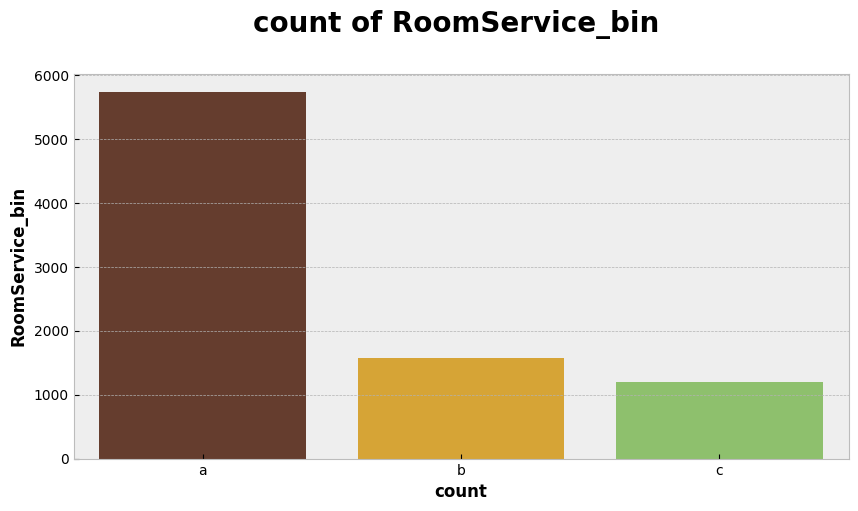

value_counts
 a    5738
b    1578
c    1193
Name: RoomService_bin, dtype: int64


transported grouped by 
 RoomService_bin  Transported
a                True           3562
                 False          2176
b                False          1047
                 True            531
c                False          1011
                 True            182
Name: Transported, dtype: int64


In [ ]:
count_plot('RoomService_bin', seed=197, transported=True)

### FoodCourt

[36]


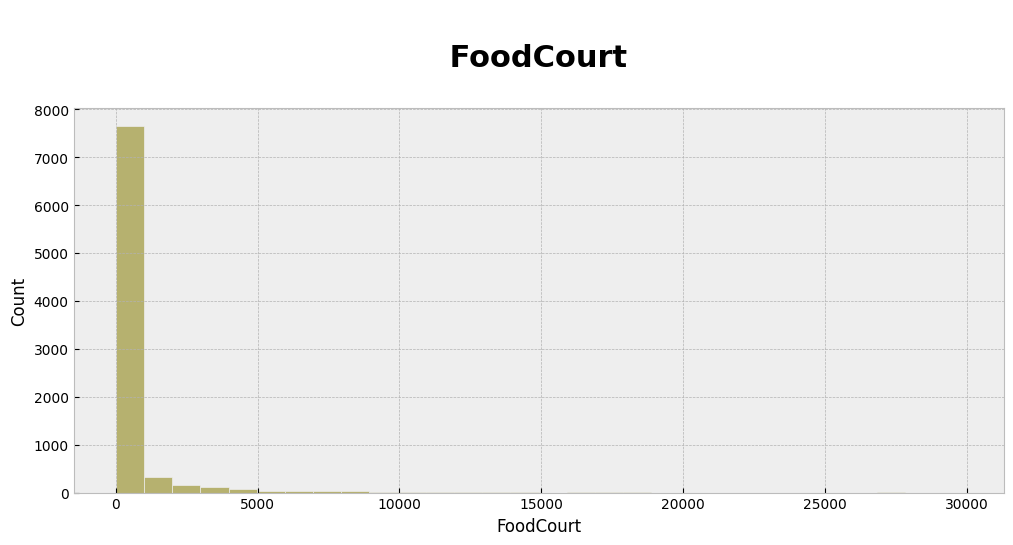

In [ ]:
hist_plot('FoodCourt')

In [ ]:
df['FoodCourt_bin'] = pd.cut(df['FoodCourt'], bins=[-1,1,500, 30000], labels=['a', 'b', 'c'])

197


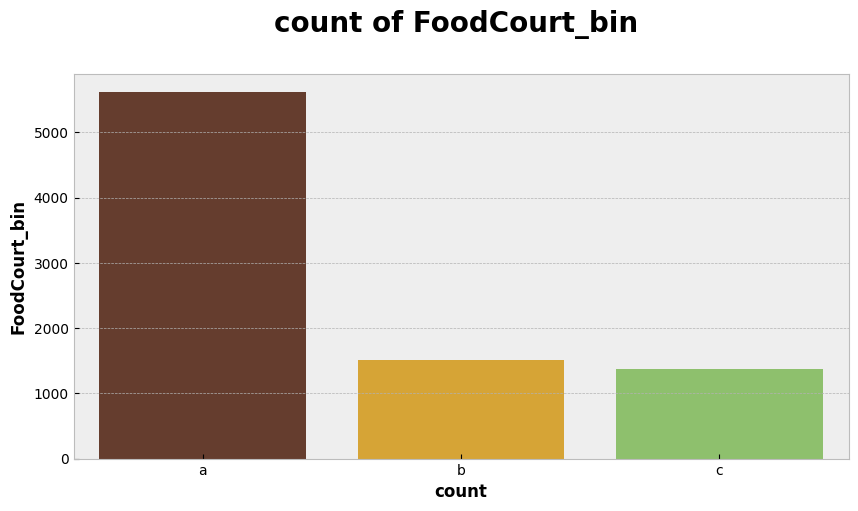

value_counts
 a    5621
b    1508
c    1380
Name: FoodCourt_bin, dtype: int64


transported grouped by 
 FoodCourt_bin  Transported
a              True           3265
               False          2356
b              False          1165
               True            343
c              False           713
               True            667
Name: Transported, dtype: int64


In [ ]:
count_plot('FoodCourt_bin', seed=197, transported=True)

### ShoppingMall

[36]


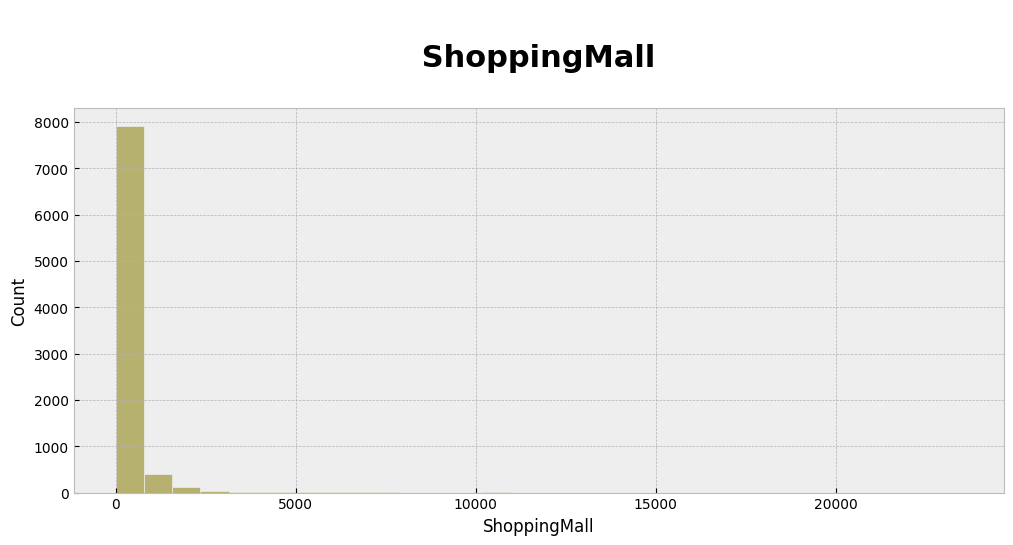

In [ ]:
hist_plot('ShoppingMall')

In [ ]:
df['ShoppingMall_bin'] = pd.cut(df['ShoppingMall'], bins=[-1,1,500, 25000], labels=['a', 'b', 'c'])

250


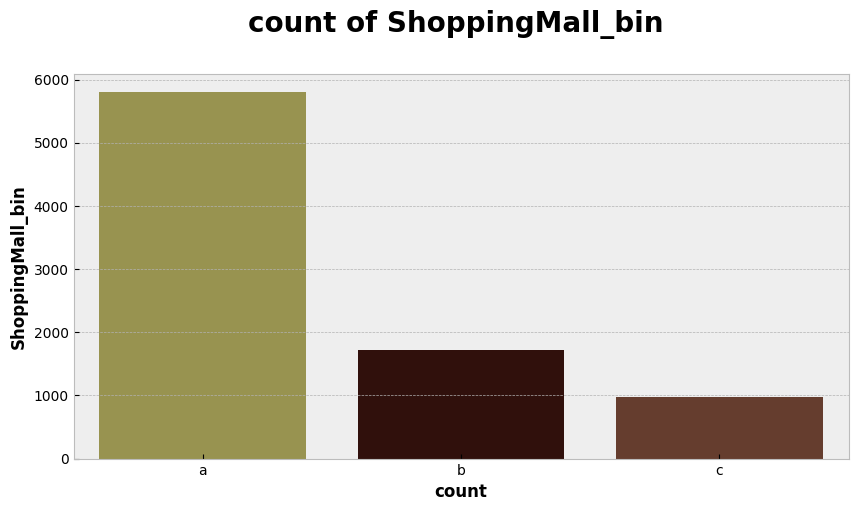

value_counts
 a    5806
b    1721
c     982
Name: ShoppingMall_bin, dtype: int64


transported grouped by 
 ShoppingMall_bin  Transported
a                 True           3411
                  False          2395
b                 False          1330
                  True            391
c                 False           509
                  True            473
Name: Transported, dtype: int64


In [ ]:
count_plot('ShoppingMall_bin', seed=250, transported=True)

### Spa

[58]


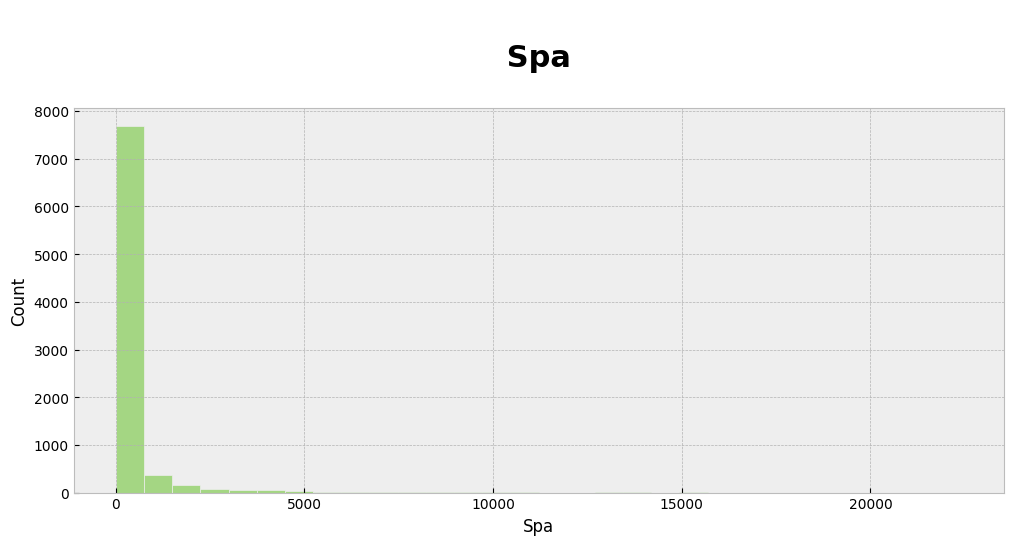

In [ ]:
hist_plot('Spa')

In [ ]:
df['Spa_bin'] = pd.cut(df['Spa'], bins=[-1,1,500, 25000], labels=['a', 'b', 'c'])

[398]


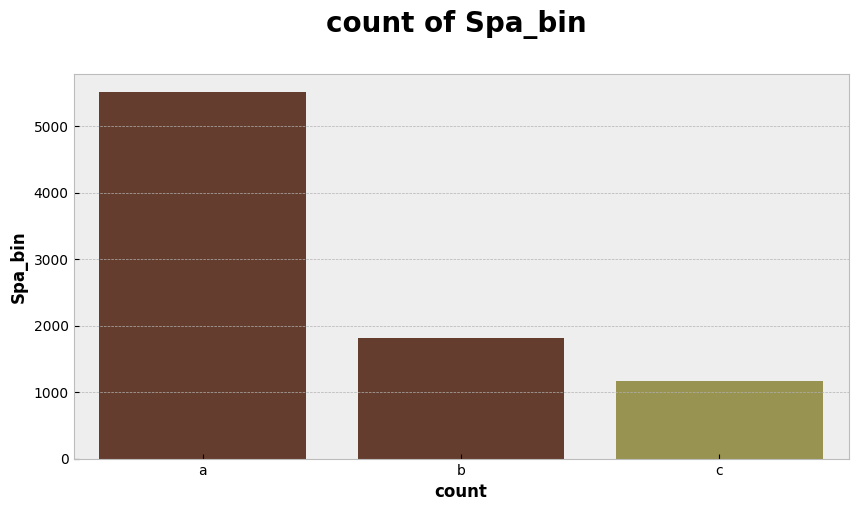

value_counts
 a    5515
b    1820
c    1174
Name: Spa_bin, dtype: int64


transported grouped by 
 Spa_bin  Transported
a        True           3456
         False          2059
b        False          1172
         True            648
c        False          1003
         True            171
Name: Transported, dtype: int64


In [ ]:
count_plot('Spa_bin', transported=True)

In [ ]:
# df.groupby('Spa_bin')['Transported'].value_counts()

### VRDeck

[106]


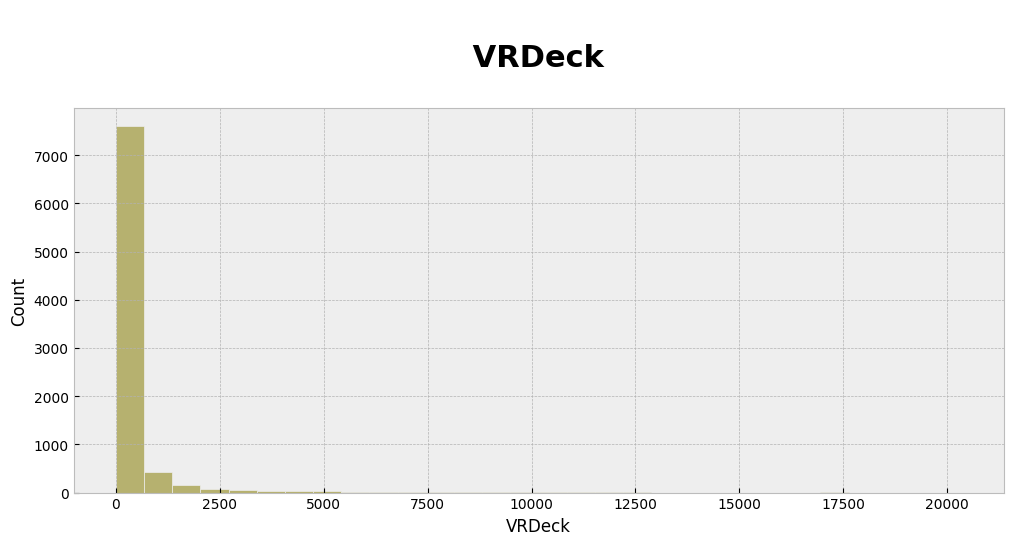

In [ ]:
hist_plot('VRDeck')

In [ ]:
df['VRDeck_bin'] = pd.cut(df['VRDeck'], bins=[-1,1,500, 25000], labels=['a', 'b', 'c'])

[52]


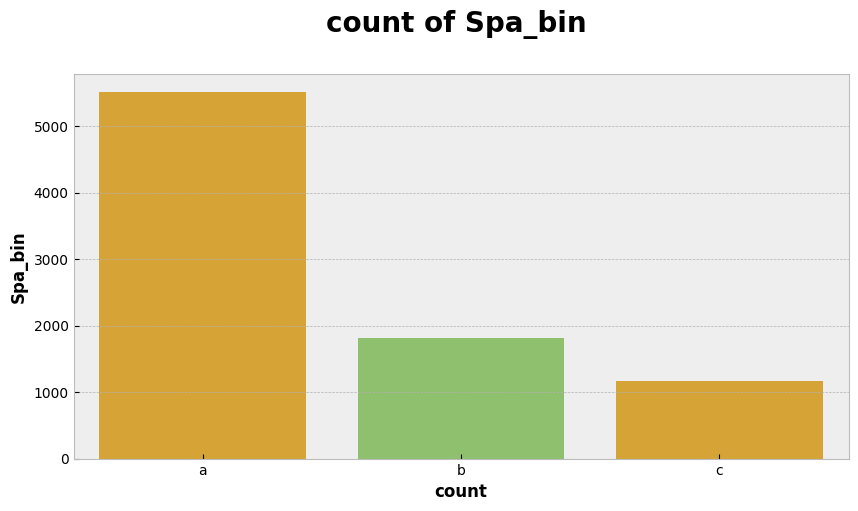

value_counts
 a    5515
b    1820
c    1174
Name: Spa_bin, dtype: int64


transported grouped by 
 Spa_bin  Transported
a        True           3456
         False          2059
b        False          1172
         True            648
c        False          1003
         True            171
Name: Transported, dtype: int64


In [ ]:
count_plot('Spa_bin', transported=True)

## Dimension Reduciton

+ Desitination - No change for PSO
+ Cabin_zone - G, A, 0, T - show almost no change between target classes


### Destination

[416]


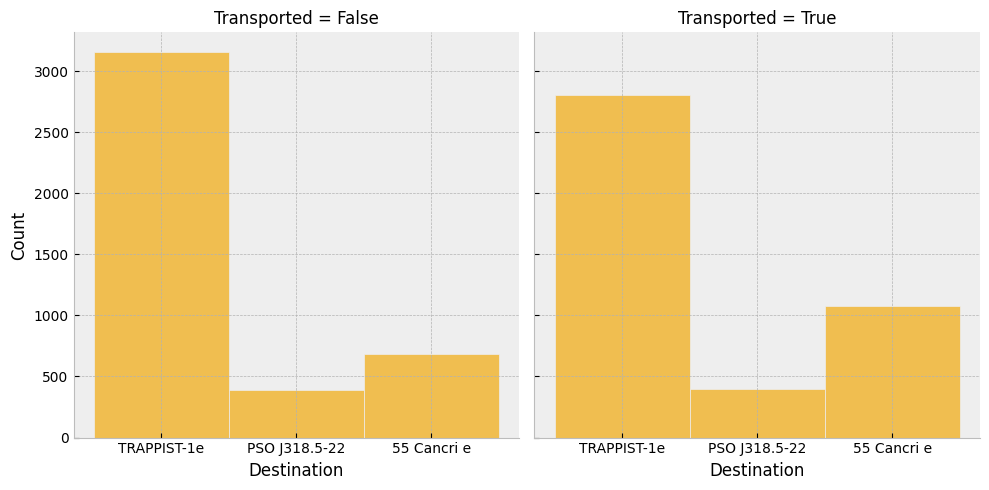

[262]


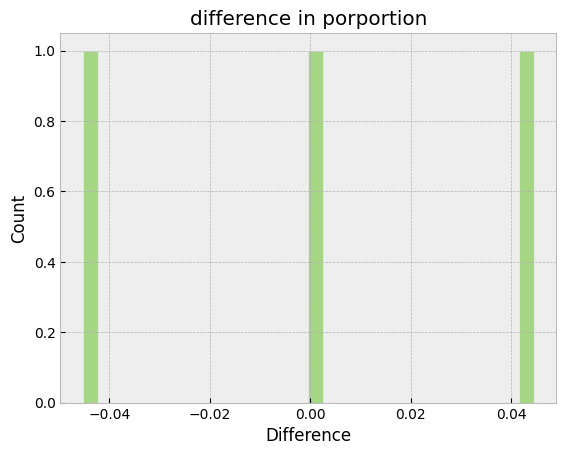

TRAPPIST-1e  55 Cancri e  PSO J318.5-22
% Destination Start        0.700435     0.207427       0.092138
% Destination Transp'd     0.655205     0.251930       0.092865
Difference                -0.045230     0.044502       0.000728

In [ ]:
dis_plot('Destination')

**Will do no dimension reduction because there is no clear way to combine the classes**

### Cabin_zone

[157]


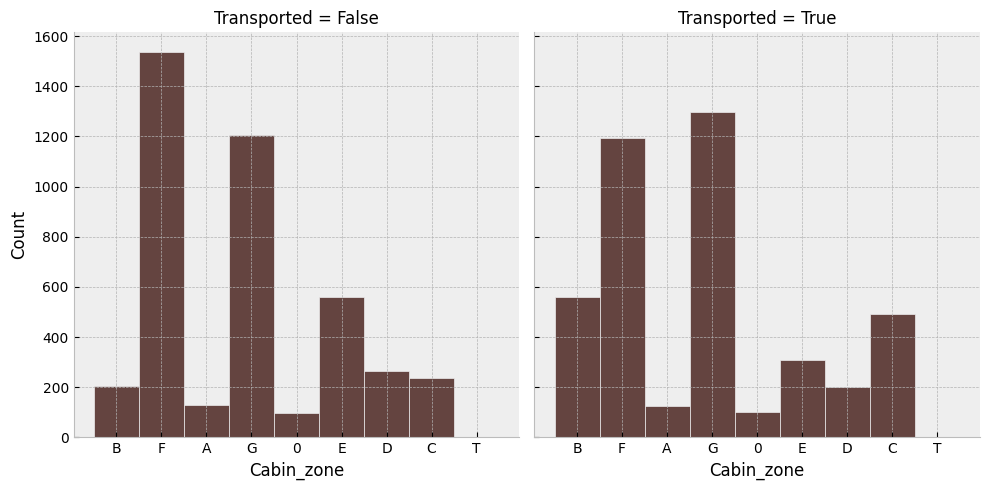

[51]


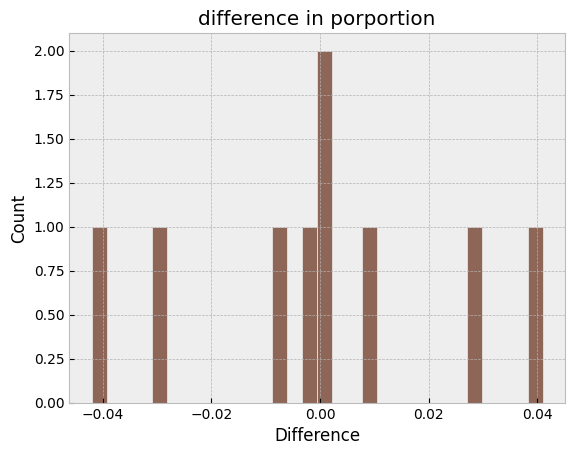

F         G         E         B         C  \
% Cabin_zone Start     0.320837  0.293807  0.102245  0.090022  0.085556   
% Cabin_zone Transp'd  0.278830  0.303158  0.072515  0.130994  0.115322   
Difference            -0.042006  0.009351 -0.029730  0.040972  0.029765   

                              D         A         0         T  
% Cabin_zone Start     0.054883  0.029381  0.022799  0.000470  
% Cabin_zone Transp'd  0.047018  0.028772  0.023158  0.000234  
Difference            -0.007866 -0.000609  0.000359 -0.000236

In [ ]:
dis_plot('Cabin_zone')

In [ ]:
df['Cabin_zone'] = df['Cabin_zone'].replace(['A', '0', 'T', 'G'], 'A')

[224]


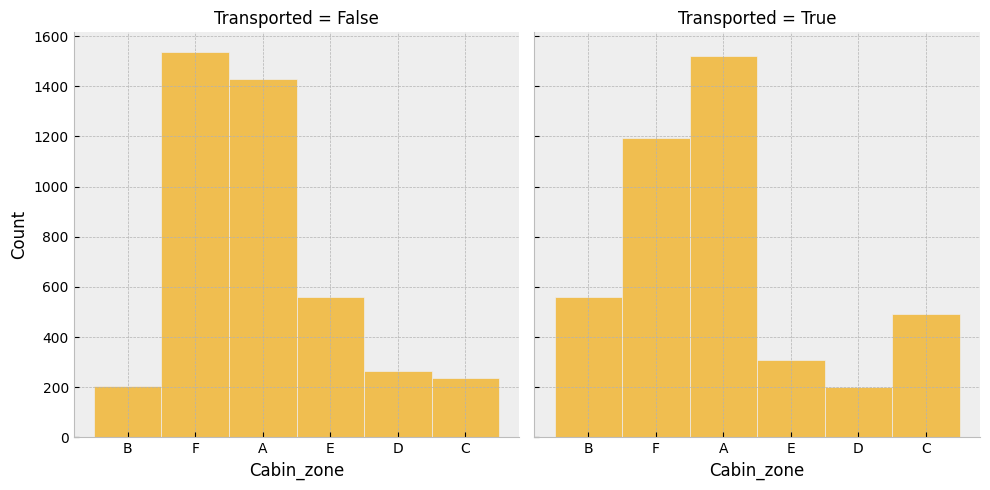

[189]


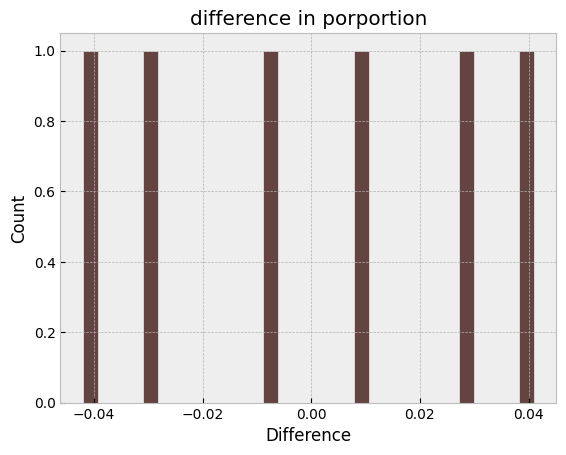

A         F         E         B         C  \
% Cabin_zone Start     0.346457  0.320837  0.102245  0.090022  0.085556   
% Cabin_zone Transp'd  0.355322  0.278830  0.072515  0.130994  0.115322   
Difference             0.008865 -0.042006 -0.029730  0.040972  0.029765   

                              D  
% Cabin_zone Start     0.054883  
% Cabin_zone Transp'd  0.047018  
Difference            -0.007866

In [ ]:
dis_plot('Cabin_zone')

In [ ]:
df['Cabin_zone'] = df['Cabin_zone'].replace('A', 'D')

[181]


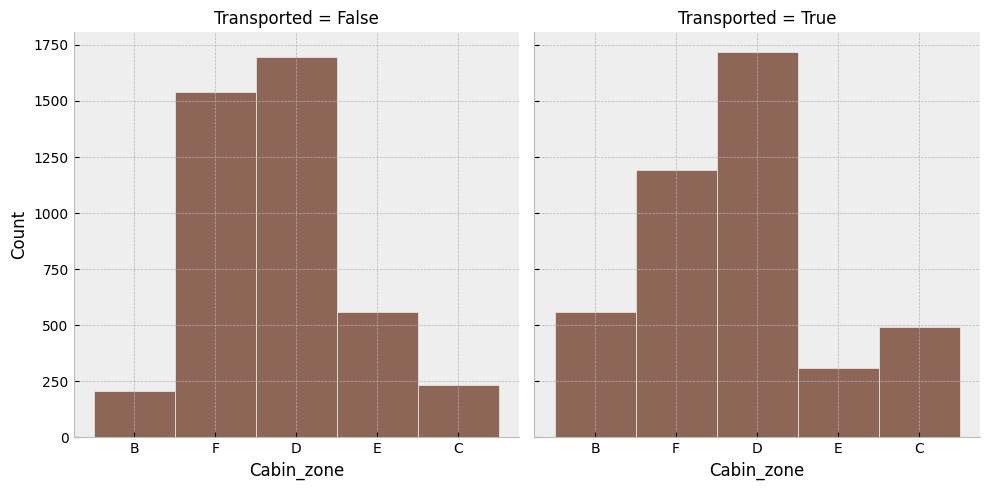

[313]


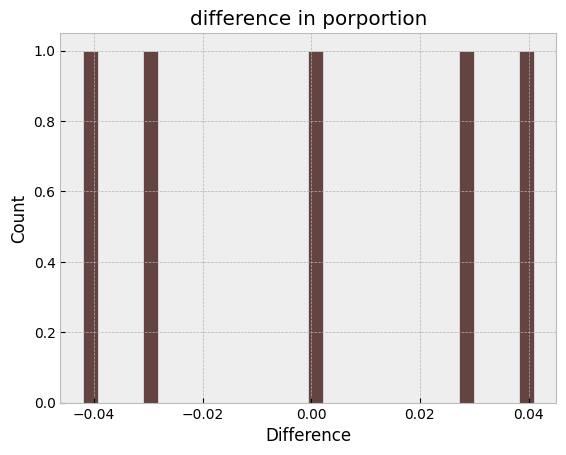

D         F         E         B         C
% Cabin_zone Start     0.401340  0.320837  0.102245  0.090022  0.085556
% Cabin_zone Transp'd  0.402339  0.278830  0.072515  0.130994  0.115322
Difference             0.000999 -0.042006 -0.029730  0.040972  0.029765

In [ ]:
dis_plot('Cabin_zone')

## features engineering

+ FoodCourt - Those who did not go to the FoodCourt show a much higher portion being transported.
  + No noticable affect for any other amount.
+ No vists to SPA represented a 16% increase in chance of being Transported

In [ ]:
def binary_for_0(x):
  if x == 0:
    value = 1
  else:
    value = 0
  return value

### FoodCourt & Spa

In [ ]:
df['FoodCourtZero'] = df['FoodCourt'].apply(binary_for_0)
df['SpaZero'] = df['Spa'].apply(binary_for_0)

In [ ]:
df['FoodCourtZero'].value_counts()

1    5505
0    3004
Name: FoodCourtZero, dtype: int64

In [ ]:
df['SpaZero'].value_counts()

1    5372
0    3137
Name: SpaZero, dtype: int64

In [ ]:
def binary_less_4(x):
  if x <= 4:
    value = 1
  else:
    value = 0
  return value

### age_less4

In [ ]:
df['Age_less4'] = df['Age'].apply(binary_less_4)

## one hot encoding

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8509 entries, 0 to 8692
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   PassengerId       8509 non-null   object  
 1   HomePlanet        8509 non-null   object  
 2   CryoSleep         8509 non-null   bool    
 3   Cabin             8509 non-null   object  
 4   Destination       8509 non-null   object  
 5   Age               8509 non-null   float64 
 6   VIP               8509 non-null   bool    
 7   RoomService       8509 non-null   float64 
 8   FoodCourt         8509 non-null   float64 
 9   ShoppingMall      8509 non-null   float64 
 10  Spa               8509 non-null   float64 
 11  VRDeck            8509 non-null   float64 
 12  Name              8509 non-null   object  
 13  Transported       8509 non-null   bool    
 14  Cabin_zone        8509 non-null   object  
 15  Cabin_code        8509 non-null   object  
 16  RoomService_cut   8509 n

In [ ]:
features_cat = ['HomePlanet', 'CryoSleep', 'Cabin_zone', 'Cabin_code','Destination',
                 'VIP', 'RoomService_bin', 'FoodCourt_bin', 'Spa_bin', 'VRDeck_bin',
                 'FoodCourtZero', 'SpaZero', 'Age_less4']

In [ ]:
df = pd.get_dummies(df, columns=features_cat)
df.shape

(8509, 48)

# Modeling

## X, y Split

In [ ]:
df.columns

Index(['PassengerId', 'Cabin', 'Age', 'RoomService', 'FoodCourt',
       'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'Transported',
       'RoomService_cut', 'ShoppingMall_bin', 'HomePlanet_Earth',
       'HomePlanet_Europa', 'HomePlanet_Mars', 'CryoSleep_False',
       'CryoSleep_True', 'Cabin_zone_B', 'Cabin_zone_C', 'Cabin_zone_D',
       'Cabin_zone_E', 'Cabin_zone_F', 'Cabin_code_0', 'Cabin_code_P',
       'Cabin_code_S', 'Destination_55 Cancri e', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e', 'VIP_False', 'VIP_True', 'RoomService_bin_a',
       'RoomService_bin_b', 'RoomService_bin_c', 'FoodCourt_bin_a',
       'FoodCourt_bin_b', 'FoodCourt_bin_c', 'Spa_bin_a', 'Spa_bin_b',
       'Spa_bin_c', 'VRDeck_bin_a', 'VRDeck_bin_b', 'VRDeck_bin_c',
       'FoodCourtZero_0', 'FoodCourtZero_1', 'SpaZero_0', 'SpaZero_1',
       'Age_less4_0', 'Age_less4_1'],
      dtype='object')

In [ ]:
df.info(

)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8509 entries, 0 to 8692
Data columns (total 48 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   PassengerId                8509 non-null   object  
 1   Cabin                      8509 non-null   object  
 2   Age                        8509 non-null   float64 
 3   RoomService                8509 non-null   float64 
 4   FoodCourt                  8509 non-null   float64 
 5   ShoppingMall               8509 non-null   float64 
 6   Spa                        8509 non-null   float64 
 7   VRDeck                     8509 non-null   float64 
 8   Name                       8509 non-null   object  
 9   Transported                8509 non-null   bool    
 10  RoomService_cut            8509 non-null   float64 
 11  ShoppingMall_bin           8509 non-null   category
 12  HomePlanet_Earth           8509 non-null   uint8   
 13  HomePlanet_Europa          8509 n

In [ ]:
features = [#'RoomService_cut','FoodCourt','ShoppingMall', 'Spa', 'VRDeck',
           'Age',
       'HomePlanet_Earth','HomePlanet_Europa', 'HomePlanet_Mars', 'CryoSleep_False',
       'CryoSleep_True', 'Cabin_zone_B', 'Cabin_zone_C', 'Cabin_zone_D',
       'Cabin_zone_E', 'Cabin_zone_F', 'Cabin_code_0', 'Cabin_code_P',
       'Cabin_code_S', 'Destination_55 Cancri e', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e', 'VIP_False', 'VIP_True', 'RoomService_bin_a',
       'RoomService_bin_b', 'RoomService_bin_c', 'FoodCourt_bin_a',
       'FoodCourt_bin_b', 'FoodCourt_bin_c', 'Spa_bin_a', 'Spa_bin_b',
       'Spa_bin_c', 'VRDeck_bin_a', 'VRDeck_bin_b', 'VRDeck_bin_c',
       'FoodCourtZero_0', 'FoodCourtZero_1', 'SpaZero_0', 'SpaZero_1',
       'Age_less4_0', 'Age_less4_1']
target = ['Transported']

X = df[features]
y = df[target]

In [ ]:
# from sklearn.model_selection import train_test_split

In [ ]:
# X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=.3, random_state=42)

### def model_scores

In [ ]:
# def model_scores(model):
#     score_tr = model.score(X_tr, y_tr)
#     score_ts = model.score(X_ts, y_ts)
#     return score_tr, score_ts

### def grid_search

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score

In [ ]:
def grid_search(model, param_grid, seed=None, cv=3, hue_feat=None):
  grid = GridSearchCV(model, param_grid,
                    scoring=make_scorer(accuracy_score),
                    cv=cv, verbose=3, n_jobs=64)

  grid.fit(X, y)
  # df_results = pd.DataFrame(grid.cv_results_).sort_values('mean_test_score', ascending=False).head()
  df_tmp = pd.DataFrame(pd.DataFrame(grid.cv_results_)[['params', 'mean_test_score']].sort_values('mean_test_score', ascending=False))

  df_summary = pd.DataFrame()
  mn_ts_scores = []
  for i, row in df_tmp.iterrows():
    mn_ts_scores.append(row[1])
    # print(row[0])
    df_tmp = pd.DataFrame(row[0], index=[0])
    df_summary = pd.concat([df_summary, df_tmp])
  df_summary['mean test score'] = mn_ts_scores
  df_summary = df_summary.reset_index(drop=True)
  print(df_summary.head())

  print(df_summary.columns)
  sns.pairplot(data=df_summary, hue=hue_feat, palette=r_color(len(df_summary[hue_feat].value_counts()), seed=seed))
  plt.show()
  return df_summary.head(10)

## KNNRegressor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knc = KNeighborsClassifier()

param_knc = dict(n_neighbors=np.arange(8,16),weights=['uniform', 'distance'],#
                 leaf_size=np.arange(5,30,2))

Fitting 3 folds for each of 208 candidates, totalling 624 fits


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


   leaf_size  n_neighbors  weights  mean test score
0         17           15  uniform         0.749325
1         21           15  uniform         0.749325
2         15           15  uniform         0.749325
3          7           15  uniform         0.749325
4         23           15  uniform         0.749325
Index(['leaf_size', 'n_neighbors', 'weights', 'mean test score'], dtype='object')
31


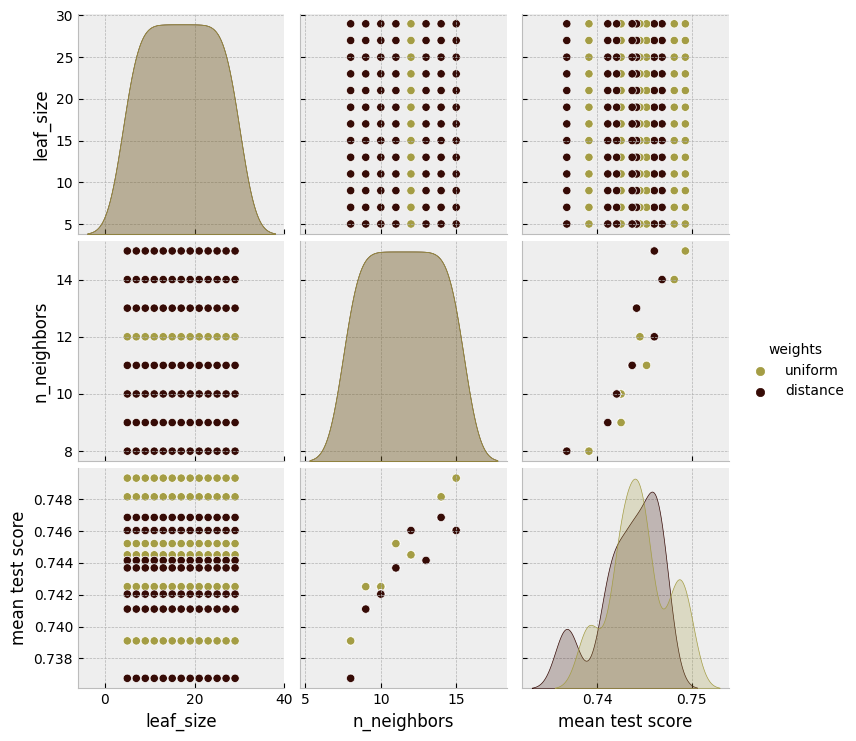

leaf_size  n_neighbors  weights  mean test score
0         17           15  uniform         0.749325
1         21           15  uniform         0.749325
2         15           15  uniform         0.749325
3          7           15  uniform         0.749325
4         23           15  uniform         0.749325
5          5           15  uniform         0.749325
6         27           15  uniform         0.749325
7         13           15  uniform         0.749325
8          9           15  uniform         0.749325
9         19           15  uniform         0.749325

In [ ]:
df_knc = grid_search(knc, param_knc, hue_feat='weights', seed=31)
df_knc

**Observations**

* KNNClassifier maxes out at an R squared of .751
 * best parameters come from 14 n_neighbors, weight uniform, leaf_size 7 to 29

## Random Forest

In [ ]:
import warnings
warnings.simplefilter('ignore')

Este código en Python utiliza la biblioteca warnings para modificar la forma en que se manejan las advertencias (warnings) en el programa. Las advertencias son mensajes que Python emite cuando encuentra situaciones que podrían ser problemáticas o indicar posibles errores en el código, pero que no son lo suficientemente graves como para detener la ejecución del programa.

La función warnings.simplefilter() se utiliza para configurar cómo se manejarán estas advertencias. En este caso, se llama a warnings.simplefilter('ignore'), lo que significa que se configurará para ignorar (no mostrar) todas las advertencias que se generen a partir de ese punto en el programa.

En resumen, este código desactiva la visualización de advertencias en el programa. Esto puede ser útil en algunas situaciones, por ejemplo, cuando se está ejecutando código que genera muchas advertencias irrelevantes y se desea limpiar la salida del programa. Sin embargo, también es importante tener en cuenta que ignorar todas las advertencias puede ocultar problemas potenciales en el código, por lo que debe usarse con precaución y solo en situaciones en las que se entienda completamente el impacto de desactivar las advertencias.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()

param_rf = dict(n_estimators=np.arange(50,410,50),max_depth=np.arange(3,16,2),
                 min_samples_leaf=np.arange(2,12,1), criterion=['gini','log_loss',  'entropy'],#'log_loss',
                #  ccp_alpha=np.arange(.0005,.0020,.0001)
                 )

El código que has proporcionado está relacionado con la configuración de hiperparámetros y la creación de un modelo de clasificación utilizando el algoritmo Random Forest. Veamos en detalle lo que está sucediendo:

Se importa la clase RandomForestClassifier del módulo sklearn.ensemble. Esto es parte de la biblioteca Scikit-Learn y se utiliza para crear un modelo de clasificación basado en el algoritmo Random Forest.

Se crea un diccionario llamado param_rf, que contiene diferentes valores para varios hiperparámetros del modelo RandomForestClassifier. Estos hiperparámetros son:

n_estimators: El número de árboles en el bosque. En este caso, se está probando un rango de valores de 50 a 400 en incrementos de 50.
max_depth: La profundidad máxima de los árboles. Se están probando valores en el rango de 3 a 15 en incrementos de 2.
min_samples_leaf: El número mínimo de muestras requeridas para que un nodo hoja sea creado. Se prueban valores en el rango de 2 a 11.
criterion: La función para medir la calidad de una división. Se están probando tres opciones: 'gini', 'log_loss' y 'entropy'.
Es importante tener en cuenta que esta configuración de hiperparámetros generará una cuadrícula de combinaciones para realizar una búsqueda exhaustiva de hiperparámetros en el proceso de ajuste del modelo.

Se instancia un objeto RandomForestClassifier() llamado rf. Esto crea un modelo de clasificación de bosque aleatorio con la configuración predeterminada.

En resumen, este código está preparando una configuración de hiperparámetros y creando un modelo de clasificación Random Forest que se puede usar para realizar ajustes y evaluaciones posteriores en la tarea de clasificación que estés abordando.

In [ ]:
df_rf = grid_search(rf, param_rf, hue_feat='criterion', seed=346)
df_rf

Fitting 3 folds for each of 1680 candidates, totalling 5040 fits


**Observations**

* RandomForest maxed out with a score of .803.
 * best hyperparameters:
    + max_depth: 13-15
    + min_samples_leaf: 5-9
    + n_estimators: 50-300
    + criterion: gini

Parece que estás utilizando una función llamada grid_search para realizar una búsqueda exhaustiva de hiperparámetros en un modelo de clasificación Random Forest. Sin embargo, el código que has proporcionado no incluye la definición de la función grid_search, por lo que puedo asumir que es una función personalizada o de alguna biblioteca externa que no has mostrado aquí.

Basado en el código que has proporcionado, parece que estás realizando lo siguiente:

Estás llamando a la función grid_search y pasando tres argumentos:

rf: El modelo de clasificación Random Forest que creaste anteriormente.
param_rf: El diccionario que contiene las combinaciones de hiperparámetros que deseas probar en la búsqueda.
hue_feat: Un argumento que probablemente se use para especificar una característica (feature) del conjunto de datos que se usará para colorear o visualizar los resultados de la búsqueda (esto es solo una suposición basada en el nombre).
Estás proporcionando otro argumento seed con el valor 346. Esto podría ser un valor de semilla que se utiliza para controlar la aleatoriedad en la búsqueda.

Estás asignando el resultado de la función grid_search a la variable df_rf.

Luego, estás imprimiendo el valor de la variable df_rf.

En resumen, este fragmento de código realiza una búsqueda exhaustiva de hiperparámetros para un modelo de clasificación Random Forest utilizando la función grid_search, y luego guarda y muestra los resultados en un DataFrame llamado df_rf. Sin embargo, dado que la definición de la función grid_search no está incluida aquí, no puedo proporcionar detalles adicionales sobre cómo se realiza la búsqueda o cómo se estructuran los resultados en el DataFrame.

## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

Esta línea de código importa la clase GradientBoostingClassifier del módulo sklearn.ensemble. La biblioteca Scikit-Learn (también conocida como sklearn) es una popular biblioteca de aprendizaje automático en Python que proporciona herramientas para realizar análisis y modelado de datos.

El GradientBoostingClassifier es un algoritmo de aprendizaje automático que pertenece a la familia de métodos de refuerzo (boosting). En particular, se basa en el método de refuerzo de gradiente, que es una técnica de ensamblado de modelos donde varios modelos más débiles (generalmente árboles de decisión) se combinan para formar un modelo más fuerte y preciso.

Este clasificador se utiliza para problemas de clasificación, donde el objetivo es predecir una variable categórica o de clase. Utiliza el enfoque de refuerzo para construir un conjunto de árboles de decisión, donde cada árbol se construye para corregir los errores del árbol anterior. En resumen, el GradientBoostingClassifier es una herramienta poderosa para la clasificación y es ampliamente utilizada en aplicaciones de aprendizaje automático.

In [ ]:
gb = GradientBoostingClassifier()

param_gb = {'loss':['logloss','deviance','exponential'],
            'learning_rate': np.arange(.01, .4, .05),
            'n_estimators':np.arange(50,410, 50),
            'max_depth':np.arange(1,12,2),
            # 'subsample':np.arange(.8,1.1,.05)
            }

Este fragmento de código está creando un objeto GradientBoostingClassifier y definiendo un diccionario param_gb que contiene diferentes valores para varios hiperparámetros del clasificador Gradient Boosting. Vamos a analizarlo en detalle:

Se instancia un objeto GradientBoostingClassifier() llamado gb. Esto crea un modelo de clasificación basado en el algoritmo Gradient Boosting con la configuración predeterminada.

Se crea un diccionario llamado param_gb, que contiene diferentes valores para los siguientes hiperparámetros del modelo GradientBoostingClassifier:

loss: La función de pérdida a optimizar durante el ajuste del modelo. Se prueban tres opciones: 'logloss', 'deviance' y 'exponential'.
learning_rate: Tasa de aprendizaje, que controla la contribución de cada árbol al modelo. Se están probando valores en el rango de 0.01 a 0.35 en incrementos de 0.05.
n_estimators: El número de árboles en el bosque. Se están probando valores en el rango de 50 a 400 en incrementos de 50.
max_depth: La profundidad máxima de los árboles. Se están probando valores en el rango de 1 a 11 en incrementos de 2.
Se comenta la línea subsample en el diccionario. subsample es un hiperparámetro que controla la fracción de las muestras que se utiliza para ajustar los árboles individuales. Sin embargo, esta línea está comentada (con #) en el diccionario, lo que significa que no se está considerando en la búsqueda de hiperparámetros.

En resumen, este código establece una configuración de hiperparámetros para el clasificador Gradient Boosting que se puede usar para realizar una búsqueda exhaustiva de hiperparámetros y ajustar el modelo en la tarea de clasificación.

In [ ]:
df_gb = grid_search(gb, param_gb, hue_feat='loss')
df_gb

Este fragmento de código parece estar utilizando una función llamada `grid_search` para realizar una búsqueda exhaustiva de hiperparámetros en un modelo de clasificación Gradient Boosting. Sin embargo, al igual que en ejemplos anteriores, el código no incluye la definición de la función `grid_search`, por lo que puedo asumir que es una función personalizada o de una biblioteca externa que no has mostrado aquí.

Aquí está lo que se puede deducir basado en el código que proporcionaste:

1. Se llama a la función `grid_search` y se pasan tres argumentos:
   - `gb`: El modelo de clasificación Gradient Boosting que creaste anteriormente.
   - `param_gb`: El diccionario que contiene las combinaciones de hiperparámetros que deseas probar en la búsqueda.
   - `hue_feat`: Un argumento que probablemente se usa para especificar una característica (feature) del conjunto de datos que se utilizará para colorear o visualizar los resultados de la búsqueda (esto es solo una suposición basada en el nombre).

2. No se proporciona información sobre el contenido de la función `grid_search`, por lo que no es posible entender completamente qué está haciendo internamente. Sin embargo, por lo general, una función de búsqueda en cuadrícula (grid search) probará todas las combinaciones posibles de hiperparámetros especificados en el diccionario `param_gb` para encontrar la mejor combinación que optimice algún criterio de evaluación, como la precisión, el F1-score, etc.

3. El resultado de la función `grid_search` se asigna a la variable `df_gb`.

4. Luego, se imprime el valor de la variable `df_gb`.

En resumen, este fragmento de código realiza una búsqueda exhaustiva de hiperparámetros en un modelo de clasificación Gradient Boosting utilizando la función `grid_search`, guarda los resultados en un DataFrame llamado `df_gb` y luego muestra el valor de ese DataFrame. El propósito de esto sería encontrar la mejor combinación de hiperparámetros para el modelo Gradient Boosting en función del criterio de evaluación elegido.

**Observations**

+ GradientBoosting maxed out with a score of .801
 + best hyperparameters:
   + n_estimators: 200-350
   + subsample: .8 - 1.0
   + loss: deviance
   + learning_rate: 0.11-.36
   + max_depth = 3

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log = LogisticRegression()

param_log = {'penalty':['l1', 'l2', 'elasticnet'],#None
             'l1_ratio':np.arange(.05, 2, .05)}

Este fragmento de código está creando un objeto `LogisticRegression` y definiendo un diccionario `param_log` que contiene diferentes valores para varios hiperparámetros del modelo de regresión logística. Vamos a analizarlo en detalle:

1. Se instancia un objeto `LogisticRegression()` llamado `log`. Esto crea un modelo de regresión logística con la configuración predeterminada.

2. Se crea un diccionario llamado `param_log`, que contiene diferentes valores para los siguientes hiperparámetros del modelo `LogisticRegression`:

   - `penalty`: El término de regularización que se aplicará al modelo. Se están probando tres opciones: 'l1' (regularización L1), 'l2' (regularización L2) y 'elasticnet' (regularización Elastic Net).
   - `l1_ratio`: El coeficiente de mezcla para la regularización Elastic Net. Se están probando valores en el rango de 0.05 a 1.95 en incrementos de 0.05.

3. El comentario `#None` sugiere que el valor `None` para el hiperparámetro `penalty` también puede ser una opción, pero está siendo excluido de la búsqueda en esta configuración.

En resumen, este código establece una configuración de hiperparámetros para el modelo de regresión logística que se puede usar para realizar una búsqueda exhaustiva de hiperparámetros y ajustar el modelo en la tarea de clasificación. Estos hiperparámetros afectarán la regularización y el comportamiento del modelo de regresión logística durante el proceso de entrenamiento.

In [ ]:
df_log = grid_search(log, param_log, hue_feat='penalty')

Este fragmento de código parece estar utilizando una función llamada `grid_search` para realizar una búsqueda exhaustiva de hiperparámetros en un modelo de regresión logística. Sin embargo, nuevamente, el código no incluye la definición de la función `grid_search`, por lo que puedo asumir que es una función personalizada o de una biblioteca externa que no has mostrado aquí.

Basado en el patrón anterior, aquí está lo que se puede deducir:

1. Se llama a la función `grid_search` y se pasan tres argumentos:
   - `log`: El modelo de regresión logística que creaste anteriormente.
   - `param_log`: El diccionario que contiene las combinaciones de hiperparámetros que deseas probar en la búsqueda.
   - `hue_feat`: Un argumento que probablemente se utiliza para especificar una característica (feature) del conjunto de datos que se utilizará para colorear o visualizar los resultados de la búsqueda (esto es solo una suposición basada en el nombre).

2. No se proporciona información sobre el contenido de la función `grid_search`, por lo que no es posible entender completamente qué está haciendo internamente. Sin embargo, por lo general, una función de búsqueda en cuadrícula (grid search) probará todas las combinaciones posibles de hiperparámetros especificados en el diccionario `param_log` para encontrar la mejor combinación que optimice algún criterio de evaluación, como la precisión, el F1-score, etc.

3. El resultado de la función `grid_search` probablemente se asigna a una variable llamada `df_log`, aunque no se muestra en el código proporcionado.

En resumen, este fragmento de código realiza una búsqueda exhaustiva de hiperparámetros en un modelo de regresión logística utilizando la función `grid_search`. El propósito de esto es encontrar la mejor combinación de hiperparámetros para el modelo de regresión logística en función del criterio de evaluación elegido. La variable `df_log` probablemente contendrá los resultados de esta búsqueda en un formato que se puede analizar y evaluar.

**Observations**

+ LogisticRegression maxed out at a score of .80
 + best hyperparameters:
    + l1_ratio:any
    + penalty: l2


## ARDRegression

In [ ]:
from sklearn.linear_model import ARDRegression

La línea de código que proporcionaste importa la clase `ARDRegression` del módulo `sklearn.linear_model`. Esta biblioteca es parte de Scikit-Learn (también conocida como sklearn), que es una popular biblioteca de aprendizaje automático en Python.

La clase `ARDRegression` se refiere a "AutoRelevance Determination Regression", que es un modelo de regresión basado en el enfoque de determinación de relevancia automática. En lugar de fijar manualmente los coeficientes de regresión, ARDRegression ajusta automáticamente la importancia relativa de las características (variables predictoras) durante el proceso de entrenamiento.

El enfoque ARDRegression es particularmente útil cuando se trabaja con conjuntos de datos que tienen muchas características, y se busca una manera automática de seleccionar y ponderar las características más relevantes para el modelo, evitando así problemas de sobreajuste.

En resumen, la clase `ARDRegression` permite crear un modelo de regresión utilizando el enfoque de determinación de relevancia automática, lo que puede resultar en un ajuste más eficiente y preciso del modelo en comparación con los métodos de regresión tradicionales.

In [ ]:
ard = ARDRegression()

param_ard = {'normalize':[True, False],
            #  'alpha_1':[1e-4,1e-5,1e-6,1e-7],
            #  'alpha_2':[1e-4,1e-5,1e-6,1e-7],
             }

Este código crea un objeto `ARDRegression` y define un diccionario `param_ard` que contiene diferentes valores para un hiperparámetro del modelo ARDRegression. A continuación, te explico en detalle:

1. Se instancia un objeto `ARDRegression()` llamado `ard`. Esto crea un modelo de regresión ARD (AutoRelevance Determination) con la configuración predeterminada.

2. Se crea un diccionario llamado `param_ard`, que contiene diferentes valores para el siguiente hiperparámetro del modelo `ARDRegression`:

   - `normalize`: Un valor booleano que indica si las características deben normalizarse antes de ajustar el modelo. Se están probando dos opciones: `True` (normalización activada) y `False` (normalización desactivada).

3. Se comentan las líneas relacionadas con `alpha_1` y `alpha_2` en el diccionario. `alpha_1` y `alpha_2` son hiperparámetros adicionales que pueden usarse para ajustar la regularización en el modelo ARDRegression. En este caso, están comentados, lo que significa que no se están considerando en la búsqueda de hiperparámetros.

En resumen, este código establece una configuración de hiperparámetros para el modelo ARDRegression que se puede usar para realizar una búsqueda de hiperparámetros y ajustar el modelo en tareas de regresión. La elección del hiperparámetro `normalize` afectará si las características se normalizan antes de ajustar el modelo ARDRegression.

In [ ]:
df_ard = grid_search(ard, param_ard, hue_feat='normalize')

Este fragmento de código parece estar utilizando una función llamada `grid_search` para realizar una búsqueda exhaustiva de hiperparámetros en un modelo de regresión ARDRegression. Sin embargo, nuevamente, el código no incluye la definición de la función `grid_search`, por lo que puedo asumir que es una función personalizada o de una biblioteca externa que no has mostrado aquí.

Aquí está lo que se puede deducir basado en el patrón previo:

1. Se llama a la función `grid_search` y se pasan tres argumentos:
   - `ard`: El modelo de regresión ARDRegression que creaste anteriormente.
   - `param_ard`: El diccionario que contiene las combinaciones de hiperparámetros que deseas probar en la búsqueda.
   - `hue_feat`: Un argumento que probablemente se utiliza para especificar una característica (feature) del conjunto de datos que se utilizará para colorear o visualizar los resultados de la búsqueda (esto es solo una suposición basada en el nombre).

2. No se proporciona información sobre el contenido de la función `grid_search`, por lo que no es posible entender completamente qué está haciendo internamente. Sin embargo, como mencioné antes, por lo general, una función de búsqueda en cuadrícula (grid search) probará todas las combinaciones posibles de hiperparámetros especificados en el diccionario `param_ard` para encontrar la mejor combinación que optimice algún criterio de evaluación, como el error cuadrado medio (MSE), R-cuadrado, etc.

3. El resultado de la función `grid_search` probablemente se asigna a una variable llamada `df_ard`, aunque no se muestra en el código proporcionado.

En resumen, este fragmento de código realiza una búsqueda exhaustiva de hiperparámetros en un modelo de regresión ARDRegression utilizando la función `grid_search`. El propósito de esto es encontrar la mejor combinación de hiperparámetros para el modelo ARDRegression en función del criterio de evaluación elegido. La variable `df_ard` probablemente contendrá los resultados de esta búsqueda en un formato que se puede analizar y evaluar.

**Observations

*

## Summary

In [ ]:
['NuSVR'] * len(df_ard)

El código que proporcionaste crea una lista que contiene el elemento `'NuSVR'` repetido varias veces. Permíteme desglosar lo que sucede aquí:

1. `['NuSVR']` es una lista que contiene un solo elemento, que es la cadena de caracteres `'NuSVR'`.

2. `len(df_ard)` es la longitud del DataFrame `df_ard`.

3. El operador `*` se utiliza para repetir elementos en una lista. Cuando haces `['NuSVR'] * len(df_ard)`, estás repitiendo el elemento `'NuSVR'` un número de veces igual a la longitud del DataFrame `df_ard`.

Entonces, en resumen, el código crea una lista que contiene la cadena `'NuSVR'` repetida varias veces, donde el número de repeticiones es igual a la longitud del DataFrame `df_ard`. Por ejemplo, si `len(df_ard)` es igual a 5, la lista resultante sería `['NuSVR', 'NuSVR', 'NuSVR', 'NuSVR', 'NuSVR']`.

In [ ]:
models = ['knc', 'rf', 'gb', 'ard']
dfs = [df_knc, df_rf, df_gb, df_ard]

for m, data in zip(models, dfs):
  data['model'] = m


Este fragmento de código crea una lista de modelos (etiquetas) y una lista de DataFrames, y luego agrega una columna llamada `'model'` a cada DataFrame, asignando el nombre del modelo correspondiente a cada fila en esa columna. Veamos en detalle:

1. `models = ['knc', 'rf', 'gb', 'ard']`: Esto crea una lista llamada `models` que contiene las etiquetas de los modelos. Los valores son `'knc'` para k-Nearest Neighbors, `'rf'` para Random Forest, `'gb'` para Gradient Boosting y `'ard'` para AutoRelevance Determination Regression.

2. `dfs = [df_knc, df_rf, df_gb, df_ard]`: Esto crea una lista llamada `dfs` que contiene los DataFrames que se supone que ya han sido generados previamente para cada modelo correspondiente. Por ejemplo, `df_knc` es el DataFrame para k-Nearest Neighbors, `df_rf` es el DataFrame para Random Forest, y así sucesivamente.

3. `for m, data in zip(models, dfs):`: Esto inicia un bucle `for` que recorre simultáneamente las listas `models` y `dfs`. `m` tomará los valores de las etiquetas de los modelos, y `data` tomará los valores de los DataFrames correspondientes.

4. `data['model'] = m`: Esto agrega una nueva columna llamada `'model'` al DataFrame actual (`data`) y asigna el valor de `m` (nombre del modelo actual) a cada fila en esa columna.

En resumen, este código agrega una columna `'model'` a cada DataFrame en la lista `dfs`, y llena esa columna con el nombre del modelo correspondiente utilizando las etiquetas de la lista `models`. Esto puede ser útil para realizar un seguimiento de qué modelo generó cada fila en los DataFrames, lo que puede ser útil para el análisis y la visualización posteriores.

In [ ]:
df_sum = pd.concat(dfs, axis=0)
df_sum.sort_values('mean test score', ascending=False).head(15)

Este fragmento de código realiza una concatenación de varios DataFrames en la lista `dfs`, y luego ordena el resultado combinado en función de la columna `'mean test score'` en orden descendente para mostrar las 15 primeras filas con los puntajes de prueba promedio más altos. Desglosemos el código paso a paso:

1. `df_sum = pd.concat(dfs, axis=0)`: Esta línea concatena todos los DataFrames en la lista `dfs` a lo largo del eje 0 (filas). Esto significa que se apilan verticalmente para formar un solo DataFrame combinado llamado `df_sum`.

2. `df_sum.sort_values('mean test score', ascending=False)`: Después de la concatenación, se realiza una clasificación del DataFrame combinado en función de la columna `'mean test score'`, en orden descendente. Esto ordena el DataFrame de manera que las filas con los puntajes de prueba promedio más altos aparezcan primero.

3. `.head(15)`: Finalmente, se utiliza el método `.head(15)` para mostrar las primeras 15 filas del DataFrame ordenado. Estas serán las 15 combinaciones de hiperparámetros con los puntajes de prueba promedio más altos.

En resumen, este código combina varios DataFrames en uno solo, los ordena en función de los puntajes de prueba promedio y muestra las 15 mejores combinaciones de hiperparámetros junto con sus puntajes de prueba promedio más altos. Esto puede ayudar a identificar las configuraciones de hiperparámetros más prometedoras para cada modelo en el análisis de búsqueda de hiperparámetros.

# Final Model

In [ ]:
final_model = RandomForestClassifier(criterion='gini', max_depth=11,
                                     min_samples_leaf=4, n_estimators=200)

# final_model = GradientBoostingClassifier(n_estimators=200, learning_rate=.26,
#                                          loss='deviance')

Este fragmento de código define un modelo final utilizando el algoritmo Random Forest y, opcionalmente, un modelo final utilizando el algoritmo Gradient Boosting. Ambos modelos están configurados con valores específicos para sus hiperparámetros. Veamos cada uno de ellos:

1. `final_model = RandomForestClassifier(criterion='gini', max_depth=11, min_samples_leaf=4, n_estimators=200)`: Esto crea un modelo final utilizando el algoritmo Random Forest. Los valores de los hiperparámetros están configurados de la siguiente manera:
   - `criterion='gini'`: El criterio para medir la calidad de una división en los árboles del bosque es el índice Gini.
   - `max_depth=11`: La profundidad máxima de los árboles en el bosque es 11.
   - `min_samples_leaf=4`: El número mínimo de muestras requeridas en un nodo hoja es 4.
   - `n_estimators=200`: El número de árboles en el bosque es 200.

2. El segundo modelo está comentado en el código, pero parece ser un modelo final utilizando el algoritmo Gradient Boosting Classifier con los siguientes hiperparámetros:
   - `n_estimators=200`: El número de árboles en el bosque es 200.
   - `learning_rate=.26`: La tasa de aprendizaje es 0.26.
   - `loss='deviance'`: Se utiliza el método de pérdida de "deviance".

Estos modelos finales se definen con hiperparámetros específicos después de la búsqueda y análisis de hiperparámetros que se realizó previamente. Los valores de los hiperparámetros se han seleccionado según los resultados y la evaluación de la búsqueda exhaustiva realizada anteriormente en el código. Puedes elegir uno de estos modelos finales o ajustarlos según tus necesidades y los resultados obtenidos.

## Competition Predictions

In [ ]:
df_test = pd.read_csv('https://raw.githubusercontent.com/brandynewanek/brandynewanek/main/spacetitanic_test.csv')

## Test preprocessing

### Fill null values

In [ ]:
df_test.isnull().sum()

In [ ]:
df_test['Age'] = df_test['Age'].fillna(df['Age'].median())

### outliers

In [ ]:
df_test['Age'] = df_test['Age'].clip(upper=62)

df_test['RoomService_bin'] = pd.cut(df_test['RoomService'], bins=[-1,1,500, 16000], labels=['a', 'b', 'c'])
df_test['FoodCourt_bin'] = pd.cut(df_test['FoodCourt'], bins=[-1,1,500, 30000], labels=['a', 'b', 'c'])
df_test['ShoppingMall_bin'] = pd.cut(df_test['ShoppingMall'], bins=[-1,1,500, 25000], labels=['a', 'b', 'c'])
df_test['Spa_bin'] = pd.cut(df_test['Spa'], bins=[-1,1,500, 25000], labels=['a', 'b', 'c'])
df_test['VRDeck_bin'] = pd.cut(df_test['VRDeck'], bins=[-1,1,500, 25000], labels=['a', 'b', 'c'])

Este fragmento de código realiza algunas transformaciones en las columnas del DataFrame `df_test`. A continuación, se describen estas transformaciones en detalle:

1. `df_test['Age'] = df_test['Age'].clip(upper=62)`: La columna `'Age'` se modifica para ajustar los valores en un rango máximo. Todos los valores mayores a 62 se ajustarán a 62. Esto puede utilizarse para limitar los valores de edad en el DataFrame.

2. `df_test['RoomService_bin'] = pd.cut(df_test['RoomService'], bins=[-1,1,500, 16000], labels=['a', 'b', 'c'])`: Se crea una nueva columna llamada `'RoomService_bin'` que binariza los valores en la columna `'RoomService'`. Los valores se dividen en tres categorías (bins) utilizando los puntos de corte proporcionados en `bins` y se les asignan etiquetas correspondientes ('a', 'b', 'c').

3. Las siguientes líneas (`'FoodCourt_bin'`, `'ShoppingMall_bin'`, `'Spa_bin'`, `'VRDeck_bin'`) son similares a la segunda línea, pero se aplican a diferentes columnas con nombres similares. Estas líneas también crean nuevas columnas binarizadas con etiquetas `'a'`, `'b'` y `'c'` en función de los puntos de corte proporcionados.

En resumen, este código realiza transformaciones en el DataFrame `df_test` al ajustar los valores en la columna `'Age'`, y crear nuevas columnas binarizadas en función de los valores en las columnas `'RoomService'`, `'FoodCourt'`, `'ShoppingMall'`, `'Spa'` y `'VRDeck'`. Estas transformaciones pueden tener varios propósitos, como preparar los datos para su posterior análisis o modelado.

### dimension reduction

In [ ]:
df_test['Cabin'].value_counts()

In [ ]:
df_test['Cabin'] = df_test['Cabin'].fillna('0')
df_test['Cabin'] = df_test['Cabin'].str.split('/')
df_test['Cabin_zone'] = df_test['Cabin'].apply(get_cabin)

df_test['Cabin_zone'] = df_test['Cabin_zone'].replace(['A', '0', 'T', 'G'], 'A')

Este fragmento de código realiza varias transformaciones en la columna `'Cabin'` del DataFrame `df_test`. A continuación, se describen estas transformaciones en detalle:

1. `df_test['Cabin'] = df_test['Cabin'].fillna('0')`: La columna `'Cabin'` se modifica para llenar los valores faltantes (NaN) con la cadena de caracteres `'0'`. Esto se hace utilizando el método `fillna()`.

2. `df_test['Cabin'] = df_test['Cabin'].str.split('/')`: Se divide cada valor en la columna `'Cabin'` en una lista de elementos utilizando '/' como separador. Esto se hace utilizando el método `str.split()`.

3. `df_test['Cabin_zone'] = df_test['Cabin'].apply(get_cabin)`: Se aplica una función llamada `get_cabin` a cada valor en la columna `'Cabin'` (que ahora es una lista). Esta función se espera que extraiga una zona o categoría específica de la lista de elementos en `'Cabin'`. El resultado de esta función se asigna a la nueva columna `'Cabin_zone'`.

4. `df_test['Cabin_zone'] = df_test['Cabin_zone'].replace(['A', '0', 'T', 'G'], 'A')`: Se reemplazan ciertos valores en la columna `'Cabin_zone'` con la cadena de caracteres `'A'`. Los valores que se reemplazan son `'A'`, `'0'`, `'T'` y `'G'`. Esto parece ser una consolidación o categorización de las zonas de la cabina en una única categoría `'A'`.

Ten en cuenta que algunos detalles, como la definición de la función `get_cabin`, no están presentes en el código proporcionado. Esta función `get_cabin` debería ser definida previamente en tu código y se utiliza para extraer la información deseada de la lista de elementos en la columna `'Cabin'`.

In [ ]:
df_test['Cabin_code'] = df_test['Cabin'].apply(get_code)

Este fragmento de código agrega una nueva columna llamada `'Cabin_code'` al DataFrame `df_test` mediante la aplicación de una función llamada `get_code` a los valores en la columna `'Cabin'`.

Aquí está lo que está sucediendo:

1. `df_test['Cabin']`: Se refiere a la columna `'Cabin'` en el DataFrame `df_test`.

2. `.apply(get_code)`: Aplica la función `get_code` a cada valor en la columna `'Cabin'`. La función `get_code` se aplicará a cada elemento de la columna y su resultado se asignará a una nueva fila en la columna `'Cabin_code'`.

En resumen, este código está utilizando la función `get_code` para procesar los valores en la columna `'Cabin'` y crear una nueva columna `'Cabin_code'` en el DataFrame `df_test` que contiene los resultados de aplicar la función a cada valor en la columna original `'Cabin'`. La función `get_code` debería ser definida previamente en tu código y puede estar diseñada para extraer y codificar información específica de los valores en la columna `'Cabin'`.

### feature engineering

In [ ]:
df_test['FoodCourtZero'] = df_test['FoodCourt'].apply(binary_for_0)
df_test['SpaZero'] = df_test['Spa'].apply(binary_for_0)
df_test['Age_less4'] = df_test['Age'].apply(binary_less_4)

### one hot encoding

In [ ]:
features_cat = ['HomePlanet', 'CryoSleep', 'Cabin_zone', 'Cabin_code','Destination',
                 'VIP', 'RoomService_bin', 'FoodCourt_bin', 'Spa_bin',  'VRDeck_bin',
                 'FoodCourtZero', 'SpaZero', 'Age_less4']

In [ ]:
df_test = pd.get_dummies(df_test, columns=features_cat)
df_test.shape

### y_pred_test

In [ ]:
X_test = df_test[features]

## Model Train

In [ ]:
final_model.fit(X, y)

## competition predictions

In [ ]:
X_test.isnull().sum()

In [ ]:
y_pred = final_model.predict(X_test)
y_pred

In [ ]:
df_pred = pd.DataFrame(y_pred).astype(int)
df_pred.head()

In [ ]:
df_pred.columns = ['Transported']
df_pred.head()

Este fragmento de código cambia el nombre de las columnas en el DataFrame `df_pred` y luego muestra las primeras filas del DataFrame modificado. Aquí está lo que hace cada parte del código:

1. `df_pred.columns = ['Transported']`: Esto cambia los nombres de todas las columnas en el DataFrame `df_pred` a un solo nombre de columna, que es `'Transported'`. Esto es útil si deseas renombrar todas las columnas en el DataFrame a un nombre específico.

2. `df_pred.head()`: Esto muestra las primeras filas (por defecto, las primeras 5 filas) del DataFrame `df_pred` después de que los nombres de las columnas han sido modificados. Esto es útil para verificar cómo se ven los datos después del cambio de nombre de columna.

En resumen, este código renombra todas las columnas del DataFrame `df_pred` a `'Transported'` y luego muestra las primeras filas del DataFrame modificado para que puedas inspeccionar los cambios.

In [ ]:
df_pred['Transported'].replace([0,1],[False,True],inplace=True)

Este fragmento de código reemplaza los valores en la columna `'Transported'` del DataFrame `df_pred`. En particular, reemplaza los valores `0` por `False` y los valores `1` por `True`. La modificación se realiza directamente en el DataFrame (`inplace=True`), lo que significa que los cambios se aplican en el lugar y no es necesario asignar el resultado a una nueva variable.

Aquí está la descripción detallada de lo que hace cada parte del código:

1. `df_pred['Transported']`: Se refiere a la columna `'Transported'` en el DataFrame `df_pred`.

2. `.replace([0, 1], [False, True], inplace=True)`: Aplica el reemplazo de valores en la columna `'Transported'` utilizando los argumentos proporcionados:
   - `[0, 1]` son los valores que se van a reemplazar.
   - `[False, True]` son los valores de reemplazo correspondientes.
   - `inplace=True` indica que los cambios deben realizarse directamente en el DataFrame sin crear una copia.

En resumen, este código modifica la columna `'Transported'` en el DataFrame `df_pred`, reemplazando los valores `0` por `False` y los valores `1` por `True`, y los cambios se aplican directamente en el DataFrame.

In [ ]:
df_pred = pd.concat([df_test['PassengerId'], df_pred],axis=1)

Este fragmento de código crea un nuevo DataFrame `df_pred` al combinar las columnas `'PassengerId'` del DataFrame `df_test` y el DataFrame `df_pred`. A continuación, se describen los detalles de lo que hace cada parte del código:

1. `pd.concat([df_test['PassengerId'], df_pred], axis=1)`: Utiliza la función `pd.concat()` de Pandas para concatenar (combinar) dos DataFrames a lo largo del eje 1 (columnas). Los argumentos son:
   - `[df_test['PassengerId'], df_pred]`: Una lista que contiene dos elementos. El primero es la columna `'PassengerId'` del DataFrame `df_test`, y el segundo es el DataFrame `df_pred`.
   - `axis=1`: Indica que la concatenación se realiza a lo largo de las columnas.

2. `df_pred = ...`: Asigna el resultado de la concatenación nuevamente a la variable `df_pred`, lo que significa que se crea un nuevo DataFrame llamado `df_pred` que contiene las columnas de `'PassengerId'` seguidas de las columnas originales de `df_pred`.

En resumen, este código combina la columna `'PassengerId'` del DataFrame `df_test` con las columnas del DataFrame `df_pred` para crear un nuevo DataFrame `df_pred` que contiene información adicional de identificación de pasajeros junto con los datos predictivos contenidos en `df_pred`.

In [ ]:
df_pred.to_csv('submission.csv', index=False)